In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

from hex_show import *
from hex_pathfinding import *
from hex_helpers import *
from hex_minmax import *
from hex_mcts import *

D:\WPy64-31150\notebooks\hex\hex_helpers.py:86: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(cache=True)
D:\WPy64-31150\notebooks\hex\hex_helpers.py:98: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(cache=True)
D:\WPy64-31150\notebooks\hex\hex_helpers.py:116: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' 

In [3]:
c = {
      0: (.2, .2, .2),
     +1: (.6, .0, .0),
     -1: (.0, .05, .85)
}

def show_value(v): #(-0.8, 0.01), 0.2, 4
    'Zeigt den Wert der Stellung neben dem Brett an'
    t = v/2 + 1/2 # scale to 0..1
    w = 0.125
    x0 = -0.8
    x1 = x0 + w
    y0 = 0
    y1 = 4
    ymid = y0*(1-t)+y1*t
    
    # red/blue bar
    red_rect  = [(x0, y0), (x1, y0), (x1, ymid), (x0, ymid)]
    blue_rect = [(x0, ymid), (x1, ymid), (x1, y1), (x0, y1)]
    red = patches.Polygon(red_rect, facecolor=c[+1], edgecolor=(.75, .75, .75), lw=.6)
    blue = patches.Polygon(blue_rect, facecolor=c[-1], edgecolor=(.75, .75, .75), lw=.6)
    plt.gca().add_patch(red)
    plt.gca().add_patch(blue)
    
    # gray triangle
    s = w*1.5
    s60 = 1/2
    c60 = 3**.5/2
    tr1 = (x1+w/2, ymid)
    tr2 = (x1+w/2 + c60*s, ymid + s60*s)
    tr3 = (x1+w/2 + c60*s, ymid - s60*s)
    triag = patches.Polygon([tr1, tr2, tr3], color=(0.6, 0.6, 0.6))
    plt.gca().add_patch(triag)

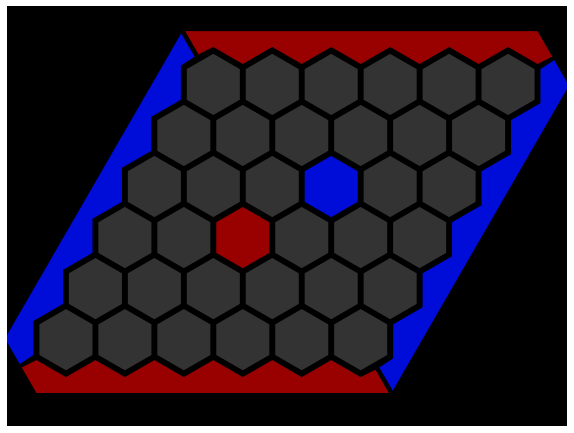

In [4]:
N = 6

board = np.zeros((N, N), 'int')
board[2,2] = 1
board[3,3] = -1

show_board(board)
##show_value(-0.5)


show_outerior(N)

NameError: name 'rollout' is not defined

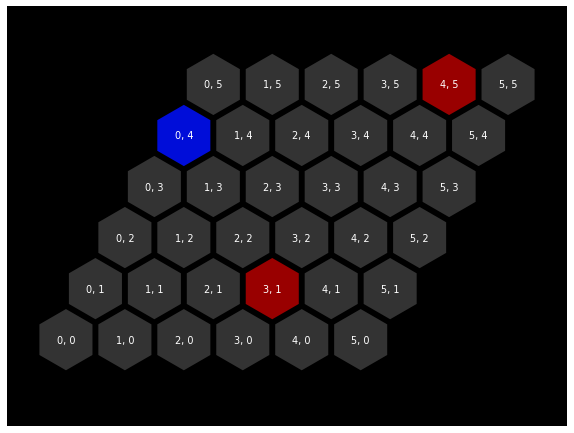

In [6]:
from hex_pathfinding import *
b = filledboard(6, 2)
b[3,1] = +1
show_board(b)

rollout(b, 100000, True)
#%timeit -n 100 rollout(b, 100, True)

The slowest run took 176.65 times longer than the fastest. This could mean that an intermediate result is being cached.
4.59 ms ± 10.8 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


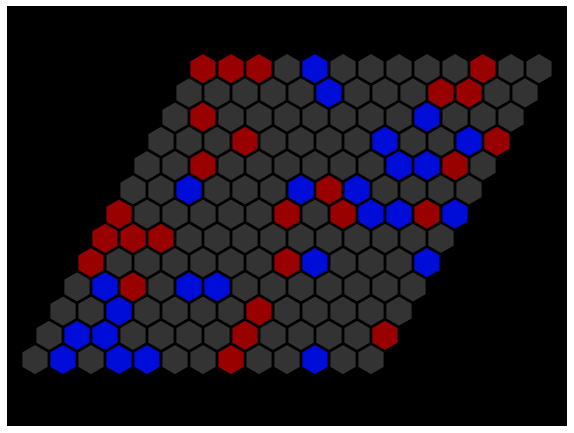

In [7]:
board = filledboard(13, .3)

show_board(board, numbers=False)
%timeit -n 100 dijkstra_dist_with_path(board.T)

In [84]:
from hex_heuristics import *

heuristic_rollout(board, n=10000)
heuristic_dijkstra(board)

0.9311096086675776

In [77]:
board = np.zeros((6,6))
board[2,:] = +1
board[2,0] = 0

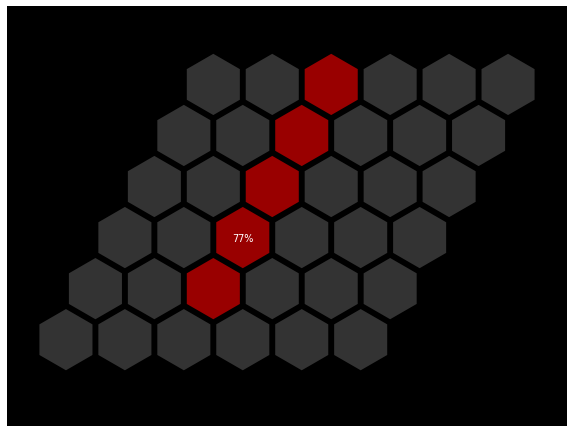

In [91]:
text = [ ['' for _ in range(6)] for _ in range(6)]
text[2][2] = '77%'

show_board(board, text=text)

## Pathfinding mit Bridges

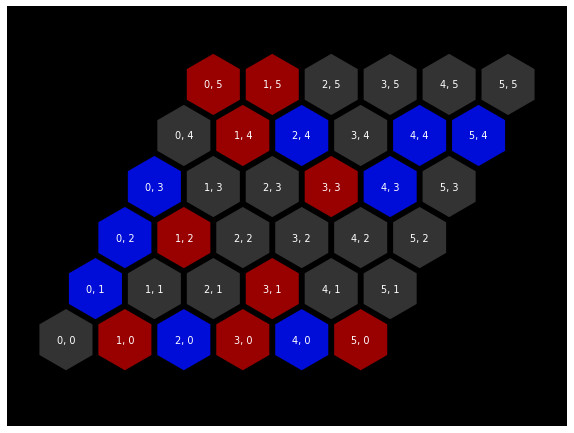

In [13]:
from temp import *

#board = filledboard(N, 1/2)
show_board(board)

d, onpath = dijkstra_dist_bridges_with_path(board)

In [14]:
onpath

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [5]:
vis_consts.hexagon

array([[ 4.50000000e-01,  2.59807621e-01],
       [ 3.18172572e-17,  5.19615242e-01],
       [-4.50000000e-01,  2.59807621e-01],
       [-4.50000000e-01, -2.59807621e-01],
       [ 3.66059273e-16, -5.19615242e-01],
       [ 4.50000000e-01, -2.59807621e-01]])

In [6]:
-np.sqrt(5)/4 +  vis_consts.gap/np.cos(vis_consts.thirty_degree)/2

-0.5012819674559849

In [ ]:
# Test:

stones = np.random.choice([0, 1], (N, N))
%timeit own_path_finding(stones)
%timeit bdfs(stones, bfs=False)

print(own_path_finding(stones))
print(bdfs(stones))

-1

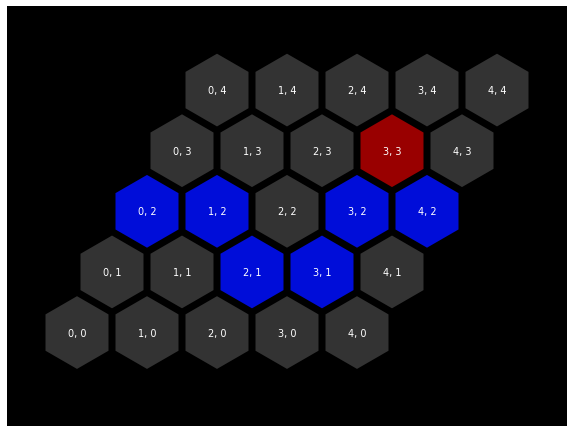

In [5]:
board = np.zeros((N, N), 'int')
board[:,2] = -1
board[2,2] = 0
board[2,1] = -1
board[3,1] = -1
board[3,3] = 1

show_board(board)
winner(board)

## Spiel gegen Computer bzw. Computer gegen Computer

In [7]:
def ismovevalid(board, i, j):
    if type(i) != int: return False
    if type(j) != int: return False
    if not 0<=i<len(board): return False
    if not 0<=j<len(board): return False
    if board[i,j] != 0: return False
    return True

def input_int(text):
    while True:
        s = input(text)
        try:
            i = int(s)
            return i
        except:
            print('Cannot convert %s to int!' % s)

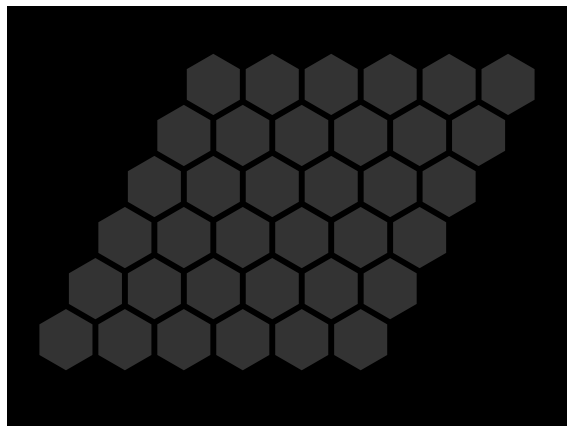

Reds turn


KeyboardInterrupt: Interrupted by user

In [8]:
from hex_minmax import *
from hex_nnet import *

bsize = 6
board = np.zeros((bsize,bsize), int)

ai_red = MiniMax(timelimit=20)
ai_blue = MiniMax(maxdepth=2, heuristics=HexHeuristicsNNet())

turn = +1

while True:
    
    show_board(board)
    plt.show()
    
    if turn>0:
        print('Reds turn')
    
        # Human Input (if Human vs. Computer)
        #'''
        while True:
            x = input_int('Input row coordinate: ')
            y = input_int('Input column coordinates: ')
            if not ismovevalid(board, x, y):
                print('Move is not valid!')
                continue
            else:
                board[x,y] = +1
                break
         #       ''';

        ## Show things:
        #rating = np.zeros((bsize,bsize))
        #for i,j in _validmoves(board):
        #    b = _domove(board, (i,j), +1)
        #    rating[i,j] = maxmin(b, maximize=True, maxdepth=2)
        #rating = rating/2 + 1/2
        #show_board(rating, False, cmap='cividis')

        # Move by an AI
        #x, y = ai_red.findmove(board, True, verbose=5)
        
    else:
        print('Blues turn')
        
        '''
        # Human Input (if Human vs. Computer)
        while True:
            x = input_int('Input row coordinate: ')
            y = input_int('Input column coordinates: ')
            if not ismovevalid(board, x, y):
                print('Move is not valid!')
                continue
            else:
                board[x,y] = +1
                break''';

        # Move by an AI
        x, y = ai_blue.findmove(board, False, verbose=5)
        #x, y = alphabeta_makemove(board, maximize=False, maxdepth=4)
        ##x, y = rollout_makemove(board, False, n=50)
        
    
    board[x,y] = turn
    turn *= -1
    
    
    # If someone has won
    won = winner(board)
    if won!=0:
        path = winning_path(board)
        if won==+1:
            print('Red has won!')
        else:
            print('Blue has won!')
        show_board(board)
        show_path(path)
        plt.show()
        break

### Computer gegen Computer

In [7]:
from hex_minmax import *
from hex_nnet import *
from hex_mcts import *

N = 6



red_wins = 0
blue_wins = 0

#### #
#from tqdm import tqdm_notebook as tqdm
#import pickle
#games_record = []
####

for k in range(1):
    
    #### #  clear tables
   # ai_red = MiniMax(timelimit=2)
    #ai_blue = MCTS(PV='Dijkstra', timelimit=2)
    ai_red = MultiMCTS(nparallel=32, nsearches=500)
    ai_blue = MultiMCTS(nparallel=32, nsearches=500)
    
    #### #  Spiele aufzeichnen
    #boards_record = []
    ####

    board = np.zeros((N,N), int)
    turn = +1
    
    while True:

        show_board(board)
        plt.show()

        
        if turn>0:
            print('Reds turn')

            # Move by an AI
            #x, y = ai_red.findmove(board, True, verbose=0)
            x, y = ai_red.findmove(board, tau=None, verbose=0)
            

        else:
            print('Blues turn')

            # Move by an AI
            #x, y = ai_blue.findmove(board, False)
            x, y = ai_blue.findmove(board, tau=None, verbose=3)
            
        '''
        #### #  Flavour with some random moves (especially at the beginning)
        if np.sum(board!=0) < 6:
            rnd = 0.5
        elif np.sum(board!=0) < 10:
            rnd = 0.1
        else:
            rnd = 0.0
        moves = validmoves(board)
        if np.random.rand() < rnd:
            i = np.random.choice(len(moves))
            x, y = moves[i]
        ####''';


        board[x,y] = turn
        turn *= -1
        
        #boards_record += [board.copy()]


        # If someone has won
        won = winner(board)
        if won!=0:
            path = winning_path(board)
            if won==+1:
                print('Red has won!')
            else:
                print('Blue has won!')
            show_board(board)
            show_path(path)
            plt.show()
            break
            
    red_wins  += int(+won/2+1/2)
    blue_wins += int(-won/2+1/2)
    
    #### # Spiele aufzeichnen
    #boards_won_record = [ (b, won) for b in boards_record ]
    
    #games_record += boards_won_record

KeyboardInterrupt: 

### Selfplay

In [21]:
pickle.dump(games_record, open('netselfplay_gamerecords.pkl', 'wb'))

In [4]:
# Funktion für das pitten zweier ai`s (Wettkampf mit n Runden)

def pit(ai1, ai2, n=20, nrnd=1, verbose=0):
    '''Pits two ai for n rounds. First nrnd moves are randomly chosen.
    confidence: sigma interval in where you want to know one ai is better than the other
    '''
        
    if type(n) is type(None) or n==np.Inf:
        n = int(1e10)
    
    wins1 = 0
    wins2 = 0
    
    for k in range(n):

        if k%2 == 0:
            ai_red  = ai1
            ai_blue = ai2
        else:
            ai_red  = ai2
            ai_blue = ai1
            
        if k%2 == 0:
            board0 = filledboard(N, nrnd)
            
        board = board0.copy()
        turn = (-1)**(board!=0).sum()

        while True:

            if turn>0:
                #'Reds turn'

                # Move by an AI
                #x, y = ai_red.findmove(board, True, verbose=0)
                x, y = ai_red.findmove(board)

            else:
                #'Blues turn'

                # Move by an AI
                #x, y = ai_blue.findmove(board, False, verbose=0)
                x, y = ai_blue.findmove(board)


            board[x,y] = turn
            turn *= -1


            # If someone has won
            won = winner(board)
            if won!=0:
                break
                
        try: ai1.clear()
        except: pass
        try: ai2.clear()
        except: pass

        if k%2==1:
            won *= -1
        wins1 += int(+won/2+1/2)
        wins2 += int(-won/2+1/2)
        sigma = np.sqrt(wins1*wins2/(wins1+wins2))
        
        if verbose:
            print(wins1, k+1)
        
        
    return wins1/n


In [12]:

ai1 = MiniMax(maxdepth=1, heuristics=HexHeuristicsNNet())
ai2 = MiniMax(maxdepth=4, heuristics=HexHeuristicsDijkstra())

pit(ai1, ai2, 20)

NameError: name 'HexHeuristicsNNet' is not defined

In [151]:
from hex_mcts import *
from hex_mcts_rave import MultiMCTS as RaveMCTS

#### negCP = 1 funktioniert bei nsearches=250 und auch bei nsearches=50 (bringt useQ sogar noch mehr), für nsearches=20 muss negCP etwas größer gewählt werden.
#### Bei nsearches >= 500 ist der Wert von negCP = 1 aber eine verschlechterung. Bis nsearches = 100 bringt es was, danach ist es manchmal kontraproduktiv

#### cpuct ist mit Wert 4 optimal für alle getesteten nsearches werte


from collections import defaultdict
from time import time
import datetime
results = defaultdict(lambda: [])

net = Net()
ai1 = RaveMCTS(nparallel=5, nsearches=150, net=net) #'net2.dat'
ai1.nrave = 5
ai1.btld = 3
ai2 = RaveMCTS(nparallel=5, nsearches=150, net=net) #'net2.dat'
ai2.nrave = 5
ai2.btld = 1

w = pit(ai1, ai2, n=20, verbose=1)
#print(c, w)

# nrave=10
# obere formel (ulist): 12/20
# untere formel: 12/20

# untrainiertes netz, nrave=10
# obere formel (ulist): 11/20
# untere formel: 9/20

1 1
2 2
3 3
3 4
3 5
3 6
4 7
4 8


KeyboardInterrupt: 

In [92]:
%load_ext line_profiler
%lprun -f RaveMCTS.rave_rollout 

acual depth: 0
acual depth: 1
acual depth: 1
acual depth: 2
acual depth: 1
acual depth: 1
acual depth: 1
acual depth: 1
acual depth: 2
acual depth: 1
acual depth: 2
acual depth: 1
acual depth: 2
acual depth: 2
acual depth: 2
acual depth: 2
acual depth: 1
acual depth: 1
acual depth: 1
acual depth: 2
acual depth: 2
acual depth: 1
acual depth: 1
acual depth: 1
acual depth: 1
acual depth: 2
acual depth: 3
acual depth: 1
acual depth: 1
acual depth: 1
acual depth: 1
acual depth: 1
acual depth: 2
acual depth: 1
acual depth: 2
acual depth: 3
acual depth: 2
acual depth: 2
acual depth: 2
acual depth: 2
acual depth: 1
acual depth: 2
acual depth: 1
acual depth: 1
acual depth: 2
acual depth: 2
acual depth: 2
acual depth: 1
acual depth: 2
acual depth: 1
acual depth: 2


(0.0, 100.0)

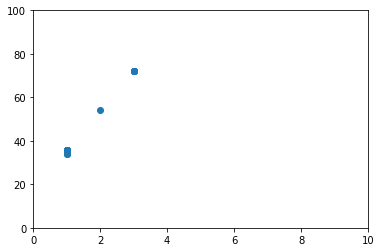

In [124]:

ai1 = RaveMCTS(nparallel=1, nsearches=50, net='net2.dat')
ai1.nrave=10
ai1.findmove(np.zeros((6,6)))

xs = []
ys = []
for k in ai1.N.keys():
    if type(k) is str:
        xs.append(ai1.N[k])
        ys.append(ai1.N[k, 'rave'])
        
plt.scatter(xs, ys)
plt.xlim([0, 10])
plt.ylim([0, 100])

In [127]:
len(ai1.v)

51

In [108]:
ai1.N[hashboard(np.zeros((6,6))), 'rave']

263124

In [14]:
for k in _results:
    results[k] = np.mean(_results[k])
    l = (k[1], k[0])
    results[l] = 1 - np.mean(_results[k])
results

defaultdict(<function __main__.<lambda>()>,
            {(1, 0): 0.7933333333333333,
             (2, 0): 0.89,
             (2, 1): 0.69,
             (3, 0): 0.72,
             (3, 1): 0.69,
             (3, 2): 0.48,
             (4, 0): 0.81,
             (4, 1): 0.78,
             (4, 2): 0.6200000000000001,
             (4, 3): 0.6100000000000001,
             (5, 0): 0.79,
             (5, 1): 0.77,
             (5, 2): 0.66,
             (5, 3): 0.6799999999999999,
             (5, 4): 0.5900000000000001,
             (0, 1): 0.20666666666666667,
             (0, 2): 0.10999999999999999,
             (1, 2): 0.31000000000000005,
             (0, 3): 0.28,
             (1, 3): 0.31000000000000005,
             (2, 3): 0.52,
             (0, 4): 0.18999999999999995,
             (1, 4): 0.21999999999999997,
             (2, 4): 0.3799999999999999,
             (3, 4): 0.3899999999999999,
             (0, 5): 0.20999999999999996,
             (1, 5): 0.22999999999999998,
         

In [ ]:
# Standardwert für cpuct ist im folgenden immer 1.5!

In [112]:

for nsearches1 in [5, 10, 50, 250, 1000]:
    for cpuct in [1.5, 4]:
        values = [results[a,b,c] for (a, b, c) in results if a==nsearches1 and c==cpuct]
        values = [ item for lst in values for item in lst]
        print(f'nsearches1 = {nsearches1:>5}, cpuct = {cpuct:>5},     mean = {np.mean(values)}')

nsearches1 =     5, cpuct =   1.5,     mean = 0.4636363636363636
nsearches1 =     5, cpuct =     4,     mean = 0.4545454545454545
nsearches1 =    10, cpuct =   1.5,     mean = 0.4327272727272728
nsearches1 =    10, cpuct =     4,     mean = 0.4218181818181818
nsearches1 =    50, cpuct =   1.5,     mean = 0.45818181818181825
nsearches1 =    50, cpuct =     4,     mean = 0.5327272727272727
nsearches1 =   250, cpuct =   1.5,     mean = 0.6111111111111108
nsearches1 =   250, cpuct =     4,     mean = 0.6796296296296297
nsearches1 =  1000, cpuct =   1.5,     mean = 0.738
nsearches1 =  1000, cpuct =     4,     mean = 0.7619999999999999


In [114]:

for nsearches1 in [5, 10, 50, 250, 1000]:
    for cpuct in [1.5, 4]:
        values = [results[a,b,c] for (a, b, c) in results if a==nsearches1==b and c==cpuct]
        values = [ item for lst in values for item in lst]
        print(f'nsearches1 = {nsearches1:>5}, cpuct = {cpuct:>5},     mean = {np.mean(values)}')

nsearches1 =     5, cpuct =   1.5,     mean = 0.6636363636363636
nsearches1 =     5, cpuct =     4,     mean = 0.6818181818181818
nsearches1 =    10, cpuct =   1.5,     mean = 0.5636363636363636
nsearches1 =    10, cpuct =     4,     mean = 0.6272727272727272
nsearches1 =    50, cpuct =   1.5,     mean = 0.5545454545454546
nsearches1 =    50, cpuct =     4,     mean = 0.6545454545454544
nsearches1 =   250, cpuct =   1.5,     mean = 0.43636363636363634
nsearches1 =   250, cpuct =     4,     mean = 0.6090909090909091
nsearches1 =  1000, cpuct =   1.5,     mean = 0.41
nsearches1 =  1000, cpuct =     4,     mean = 0.5


In [139]:

for nsearches1 in [50, 100, 250]:
    for negCP in [0.5, 1, 2]:
            values = [results[a,b] for (a, b) in results if a==nsearches1 and b==negCP]
            values = [ item for lst in values for item in lst]
            print(f'nsearches1 = {nsearches1:>5},     negCP      = {negCP:>5},     len = {len(values)},     mean = {np.mean(values):.4f}')
print()

for nsearches1 in [50, 100, 250]:
        values = [results[a,b] for (a, b) in results if a==nsearches1]
        values = [ item for lst in values for item in lst]
        print(f'nsearches1 = {nsearches1:>5},                             len = {len(values)},     mean = {np.mean(values):.4f}')
print()

for negCP in [0.5, 1, 2]:
        values = [results[a,b] for (a, b) in results if b==negCP]
        values = [ item for lst in values for item in lst]
        print(f'                        negCP      = {negCP:>5},     len = {len(values)},     mean = {np.mean(values):.4f}')

nsearches1 =    50,     negCP      =   0.5,     len = 3,     mean = 0.6000
nsearches1 =    50,     negCP      =     1,     len = 3,     mean = 0.5667
nsearches1 =    50,     negCP      =     2,     len = 3,     mean = 0.5267
nsearches1 =   100,     negCP      =   0.5,     len = 2,     mean = 0.4700
nsearches1 =   100,     negCP      =     1,     len = 2,     mean = 0.5100
nsearches1 =   100,     negCP      =     2,     len = 2,     mean = 0.5700
nsearches1 =   250,     negCP      =   0.5,     len = 2,     mean = 0.4700
nsearches1 =   250,     negCP      =     1,     len = 2,     mean = 0.4900
nsearches1 =   250,     negCP      =     2,     len = 2,     mean = 0.4400

nsearches1 =    50,                             len = 9,     mean = 0.5644
nsearches1 =   100,                             len = 6,     mean = 0.5167
nsearches1 =   250,                             len = 6,     mean = 0.4667

                        negCP      =   0.5,     len = 7,     mean = 0.5257
                       

In [92]:
for Q0 in [0., -.3, -.15, .15, .3]:
    values = [results[a,b,c] for (a, b, c) in results if a==Q0]
    values = [ item for lst in values for item in lst]
    print(f'Q0       = {Q0:>5},     mean = {np.mean(values)}')    
    
for part in [1., .9, 0.8, 0.6]:
    values = [results[a,b,c] for (a, b, c) in results if b==part]
    values = [ item for lst in values for item in lst]
    print(f'part     = {part:>5},     mean = {np.mean(values)}')
    
for weight_v in [.1, .5, 1]:
    values = [results[a,b,c] for (a, b, c) in results if c==weight_v]
    values = [ item for lst in values for item in lst]
    print(f'weight_v = {weight_v:>5},     mean = {np.mean(values)}')

Q0       =   0.0,     mean = 49.0
Q0       =  -0.3,     mean = 51.083333333333336
Q0       = -0.15,     mean = 48.166666666666664
Q0       =  0.15,     mean = 49.25
Q0       =   0.3,     mean = 49.833333333333336
part     =   1.0,     mean = 49.94444444444444
part     =   0.9,     mean = 50.05555555555556
part     =   0.8,     mean = 49.0
part     =   0.6,     mean = 48.46666666666667
weight_v =   0.1,     mean = 47.17391304347826
weight_v =   0.5,     mean = 49.130434782608695
weight_v =     1,     mean = 52.04545454545455


In [ ]:
# Beide schneiden exakt gleich gut ab! Obwohl nsearches halbiert ist!
ai1 = MultiMCTS(net='net_selfplay150.dat', nparallel=1, nsearches=25, params={'useQ': True, 'negCP': .5})
ai2 = MultiMCTS(net='net_selfplay150.dat', nparallel=1, nsearches=50, params={'useQ': False})

# hier eben (negCP optimal gewählt)
ai1 = MultiMCTS(net='net_selfplay150.dat', nparallel=4, nsearches=50, params={'useQ': True, 'negCP': 1.0})
ai2 = MultiMCTS(net='net_selfplay150.dat', nparallel=4, nsearches=150, params={'useQ': False})

In [ ]:
# Winrate von 55% obwohl viel mehr searches
ai1 = MultiMCTS(net='net_selfplay50.dat', nparallel=5, nsearches=150)
ai2 = MultiMCTS(net='net_selfplay50.dat', nparallel=5, nsearches=50)

# ebenfall nur 55%
ai1 = MultiMCTS(net='net_selfplay50.dat', nparallel=5, nsearches=500)
ai2 = MultiMCTS(net='net_selfplay50.dat', nparallel=5, nsearches=50)

# nur 60%
ai1 = MultiMCTS(net='net_selfplay50.dat', nparallel=25, nsearches=1500)
ai1 = MultiMCTS(net='net_selfplay50.dat', nparallel=25, nsearches=500)

In [27]:
# Elo berechnen

from scipy.optimize import fmin, fmin_bfgs


# Werte von Hex-Minimax (t=0.1, 0.3, 0.5, 0.7)
p = np.array([
    [0.5 , 0.25, 0.3 , 0.05],
    [0.75, 0.5 , 0.2 , 0.15],
    [0.7 , 0.8 , 0.5 , 0.3 ],
    [0.95, 0.85, 0.7 , 0.5 ]
])

# Werte von Hex-Minimax (t=0.1, 0.2, 0.3, 0.4) mit Sortierung der Züge
p = np.array([
    [0.5 , 0.35, 0.35, 0.25],
    [0.65, 0.5 , 0.55, 0.25],
    [0.65, 0.45, 0.5 , 0.45],
    [0.75, 0.75, 0.55, 0.5 ]
])


def f(d):
    return 1/(1+np.exp(-d/400)) # monoton wachsend


def loglikelihood_2players(elo1, elo2, p12, n=100):
    '''Logarithm of the probability that p12 happens if elo1 and elo2 are elo number of player 1 and player 2.
    p12: Empirical win probability for player 1 against player 2.
    n: Number of games
    '''
    p_elo = f(elo1-elo2) # predicted win probability
    return -(p12 - p_elo)**2 / (2 * p_elo * (1-p_elo)) * n  # vereinfachte formel
    #return -1/2*np.log(n*p_elo*(1-p_elo)) -(p12 - p_elo)**2 / (2 * p_elo * (1-p_elo)) * n  # exaktere Formel (lieber genähert rechnen, scheint stabiler)



def computeElo(matches, nplayer=None):
    '''Berechnet die Elo der Player auf Grundlage ihrer Spielergebnisse gegeneinander.
    matches: Ein dictionary von Spielergebnissen.
    '''
    if nplayer is None: nplayer = len(matches)
        
    def neglikelihood(elos):
        lh = 0
        for i in range(nplayer):
            for j in range(i):
                lh += loglikelihood_2players(elos[i], elos[j], matches[i,j])
        return -lh
    
    return fmin(neglikelihood, nplayer*(0,), disp=0)



computeElo(p, 3)

array([-520.22880094,   11.48883271,  326.67926554])

## MCTS Tiefe visualisieren

In [9]:
def visualize_tree(mcts):
    depths = defaultdict(lambda: 0)
    for d in mcts.Ds.values():
        depths[d] += 1
    ldepths = [ np.log10(depths[d]) for d in range(max(depths.keys())+1)]
    plt.plot(np.arange(len(ldepths)), ldepths, 'C1x--')
    print(sum(depths.values()))
    #return ldepths, depths

mcts = MultiMCTS(nparallel=1, nsearches=500)
mcts.nvirtual = 5
#mcts = MCTS(nsearches=500)
mcts.cpuct_formula = lambda p, ns_sqrt, nsa: 4 * p * np.log(nsa+2) / np.sqrt(nsa+1)
board = np.zeros((6,6))
mcts.findmove(board)

(5, 0)

474


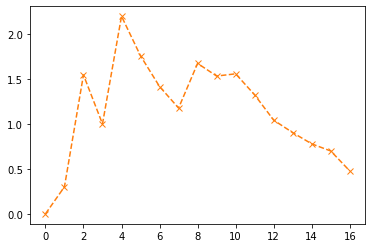

In [10]:
visualize_tree(mcts)

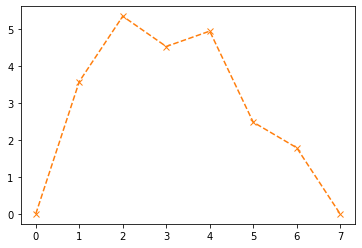

In [34]:
# Baseline
visualize_tree(mcts)

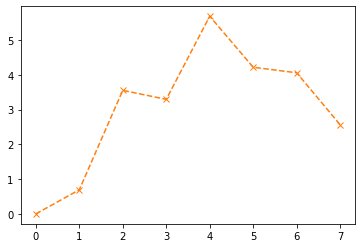

In [40]:
# 4 * p / (nsa+1)
visualize_tree(mcts)

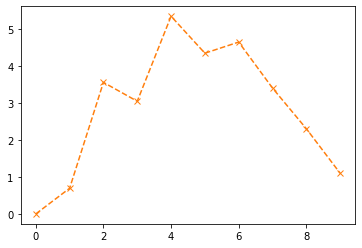

In [42]:
# 4 * p / sqrt(nsa+1)
visualize_tree(mcts)

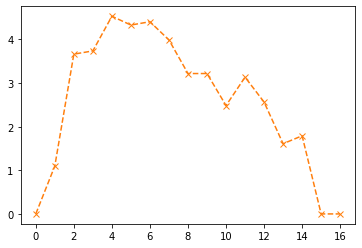

In [46]:
# 4 * p * ln(nsa+1) / sqrt(nsa+1)
visualize_tree(mcts)

In [19]:

ai1 = MultiMCTS(nparallel=1, nsearches=500)
ai1.cpuct_formula = lambda p, ns_sqrt, nsa: 4 * p / np.sqrt(nsa+1)

ai2 = MultiMCTS(nparallel=1, nsearches=500)
#ai2.cpuct_formula = lambda p, ns_sqrt, nsa: 4 * p * np.log(nsa+2) / np.sqrt(nsa+1)

pit(ai1, ai2, nrnd=2)

0 1
0 2
0 3
0 4
0 5
1 6
2 7
2 8
2 9
2 10


KeyboardInterrupt: 

(-1.0, 1.0)

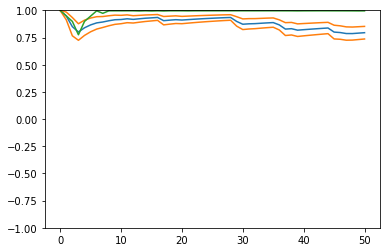

In [106]:

ss = [s for s, n in ai2.N.items() if 50 <= n <= 100]
s = ss[3]

W = ai2.W[s]
#plt.plot(W)
plt.plot([np.mean(W[:k]) for k in range(1,len(W))])
plt.plot([np.mean(W[:k])+np.std(W[:k])/np.sqrt(k) for k in range(1,len(W))], 'C1')
plt.plot([np.mean(W[:k])-np.std(W[:k])/np.sqrt(k) for k in range(1,len(W))], 'C1')
plt.plot([np.median(W[:k]) for k in range(1,len(W))], 'C2')
plt.ylim([-1,1])

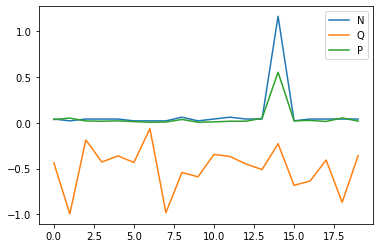

In [100]:

ss = [s for s, n in ai2.N.items() if 80 <= n <= 100]
s = ss[3]

p,_,valid=ai2.getP_V_Valid(None, s)
valid_rev = {(i,j): l for l, (i,j) in enumerate(valid)}
Q = [ai2.Qa[k] for k in ai2.Qa.keys() if len(k)==2 and k[0]==s]
N = [ai2.Na[k]/50 for k in ai2.Qa.keys() if len(k)==2 and k[0]==s]
P = [p[valid_rev[k[1]]] for k in ai2.Qa.keys() if len(k)==2 and k[0]==s ]

plt.plot(N, label='N')
plt.plot(Q, label='Q')
plt.plot(P, label='P')
plt.legend()

## Patterns finden

In [121]:
def find_dead_cells(board):
    niterations = 1000
    N = len(board)
    corr = np.zeros_like(board)
    for _ in range(niterations):
        b = board.copy()
        b = fillboard_fast(b)
        for i in range(N):
            for j in range(N):
                b[i,j] = -1
                wm = 2*winner_fast(b, +1)-1
                b[i,j] = +1
                wp = 2*winner_fast(b, +1)-1
                b[i,j] = board[i,j]
                if b[i,j] == 0:
                    b[i,j] = np.random.choice([+1, -1])
                corr[i,j] += wp-wm
    corr /= niterations
    return corr + (board!=0)
    
board = np.zeros((8,8))
board[3,3] = 1.
board[2,4] = 1.
board[2,5] = 1.
board[4,4] = -1.

board = filledboard_fast(11, .5)

def find_pattern():
    N = 8
    board = filledboard_fast(N, .5)
    deadcells = find_dead_cells(board)
    k = np.argmin(deadcells)
    i, j = k//N, k%N
    assert deadcells[i,j] == 0
    while True:
        b = board.copy()
        while True:
            ii, jj = np.random.randint(0, N, 2)
            if (ii, jj) != (i,j) and b[ii,jj] != 0:
                break
        b[ii,jj] = 0
        dcs = find_dead_cells(b)
        if dcs[i,j] == 0:
            board = b
            print(np.sum(board!=0))
        if np.sum(board!=0)<10:
            show_board(board)
            plt.show()

31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9


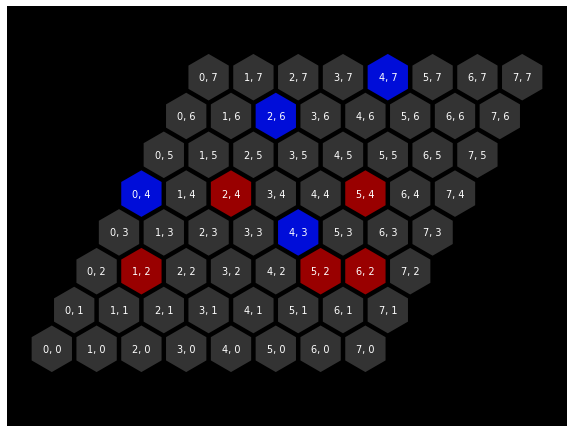

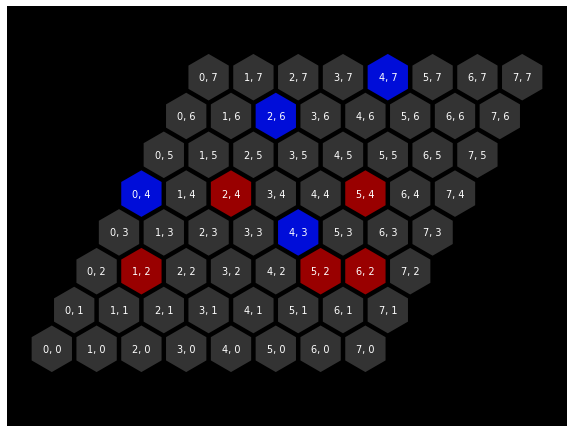

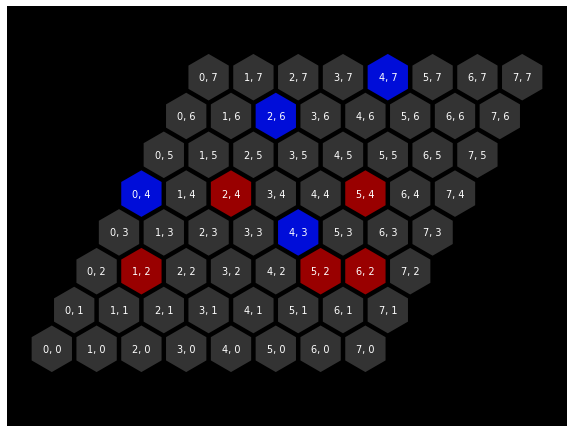

8


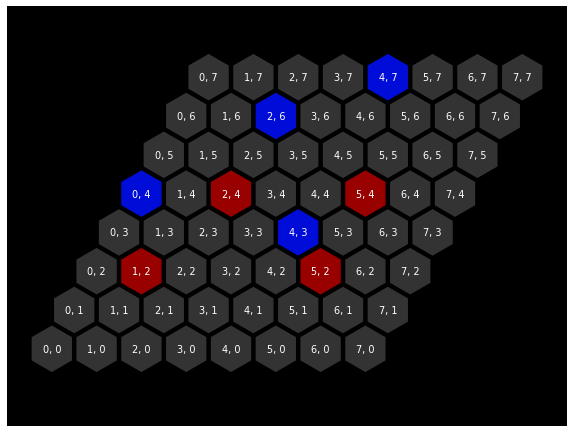

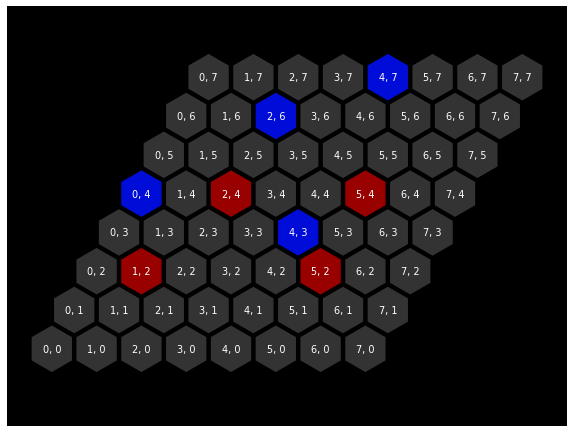

7


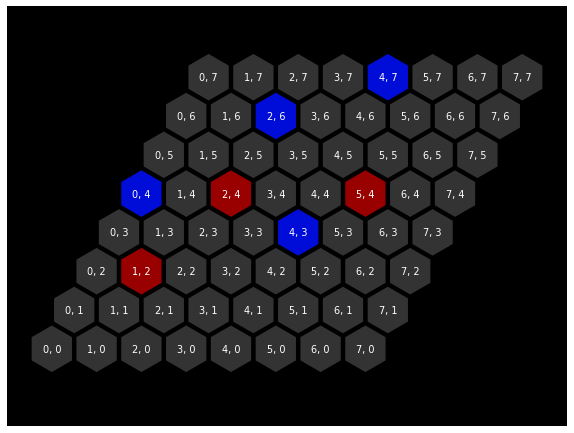

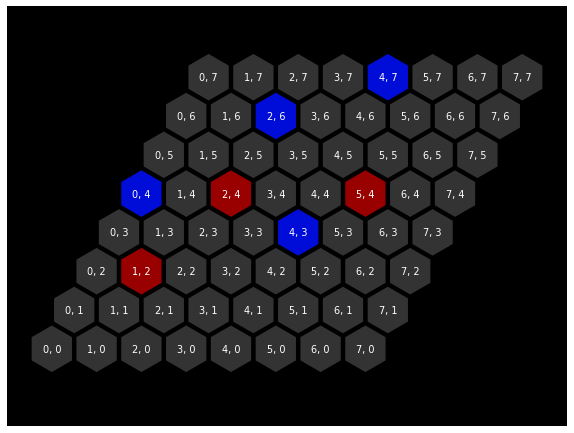

6


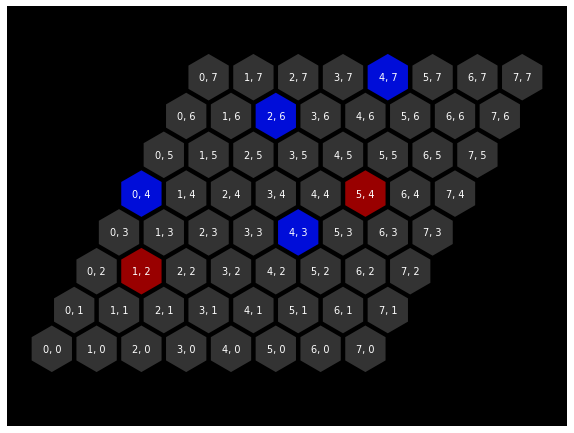

5


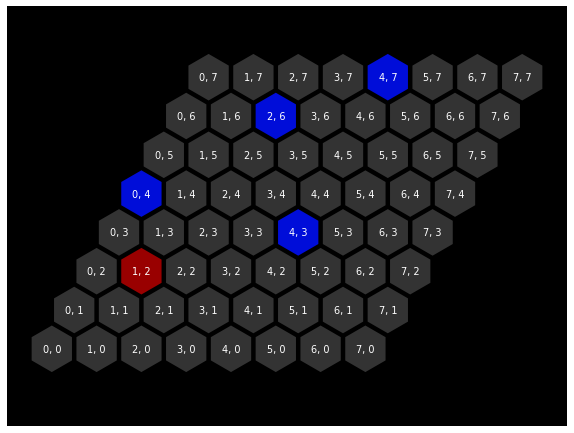

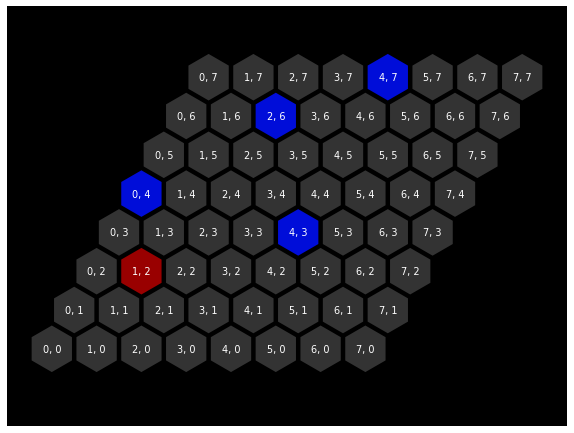

4


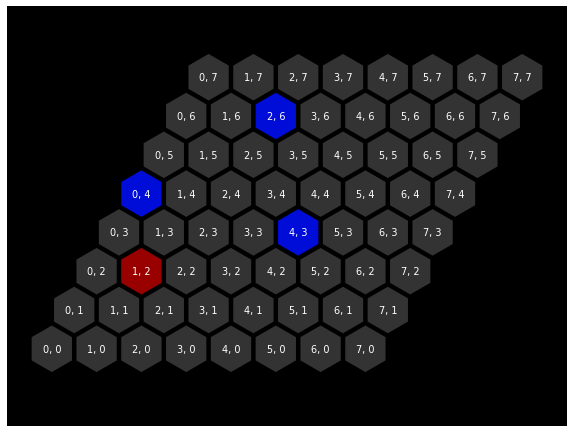

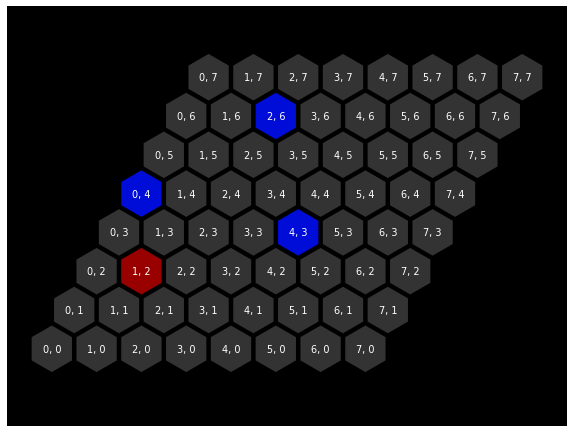

KeyboardInterrupt: 

In [122]:
find_pattern()

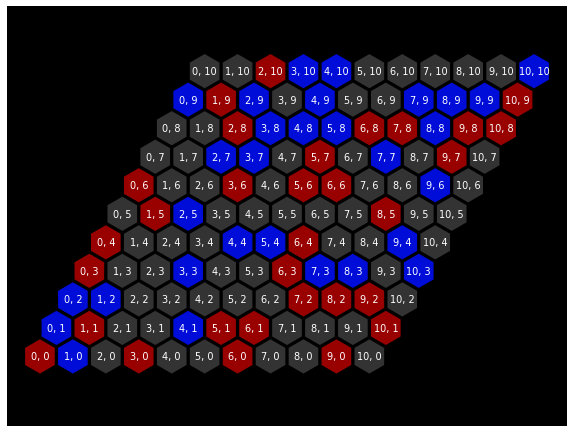

In [108]:
show_board(board)

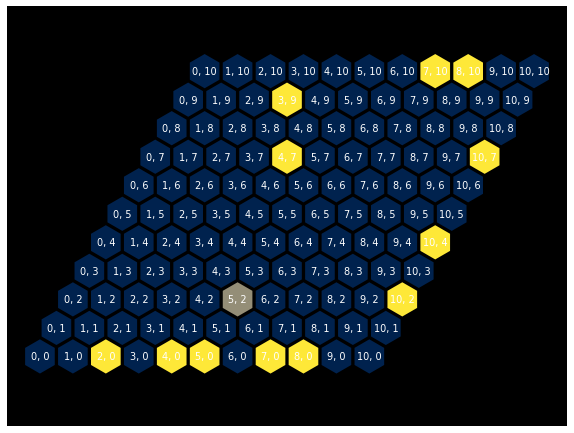

In [109]:
corr = find_dead_cells(board)
show_board(1-abs(corr)*100, cmap='cividis')

## MCTS aufzeichnen
... um mit reinforced learning die Actionwahl zu verbessern

In [59]:
from tqdm.notebook import trange
import pickle as pkl

N = 6

mcts = MultiMCTS(nparallel=10, nsearches=100)
history = []

for iter in trange(2701,20000):
    
    mcts.clear()
    board0 = filledboard(N, np.random.randint(2, 18))
    Wa = [ [0] for _ in range(N**2) ]
    
    mcts.findmove(board0)
    s0 = board0.tobytes()
    P = mcts.p[s0]
    V = mcts.v[s0]
    valid = mcts.validactions[s0] # valid: l --> (i,j)
    validinv = [ (valid.index(divmod(k,N)) if divmod(k,N) in valid else None) for k in range(N**2)  ]  # inverted valid: k=(i,j) --> l
    P = [ P[l] if l is not None else None for l in validinv ]  # P-Liste mit None ergänzen, wenn zug invalid
    
    for k in range(N**2):
    
        i, j = divmod(k, N)
        if board0[i,j] != 0:
            continue
        
        # Zug anwenden
        board = board0.copy()
        board[i, j] = 1
        if winner_fast(board) != 0:
            continue
            
        # MCTS anwenden auf diesen Zug
        mcts.findmove(board)
        
        # Relevante Daten extrahieren
        s = board.tobytes()
        Wa[k] = mcts.W[s]
        
    history.append((board0, P, V, Wa))
    print(f'V =       {V}\nMax(Wa) = {max([W[0] if W!=[0] else -100 for W in Wa])}')
    
    if iter%100 == 0:
        with open(f'F:\$Daten\hex_mcts_data\mcts_treedata{iter}.pkl', 'wb') as f:
            pkl.dump(history, f)
            history = []

V =       0.6911823153495789
Max(Wa) = 0.9999961256980896
V =       1.0
Max(Wa) = 1
V =       -0.7180033922195435
Max(Wa) = 0.9222697615623474
V =       0.9945881962776184
Max(Wa) = 1.0
V =       0.6844619512557983
Max(Wa) = 0.9999436140060425
V =       0.9999915361404419
Max(Wa) = 0.9999999403953552
V =       0.599814772605896
Max(Wa) = 0.9999999403953552
V =       0.9988791346549988
Max(Wa) = 1.0
V =       0.9914191365242004
Max(Wa) = 1.0
V =       -0.5699437260627747
Max(Wa) = 0.9999449849128723
V =       0.9275322556495667
Max(Wa) = 0.9972395300865173
V =       0.9998731017112732
Max(Wa) = 0.9999968409538269
V =       -0.810129702091217
Max(Wa) = -0.01672845333814621
V =       0.9999927878379822
Max(Wa) = 1.0
V =       0.9148008823394775
Max(Wa) = 0.9996698498725891
V =       -0.23312446475028992
Max(Wa) = 0.9999114274978638
V =       -0.4588683247566223
Max(Wa) = 0.9982849359512329
V =       0.292562335729599
Max(Wa) = 0.9586686491966248
V =       0.8192526698112488
Max(Wa) = 1.0


V =       0.7700753211975098
Max(Wa) = 0.9999995231628418
V =       -0.2109767198562622
Max(Wa) = 0.8018390536308289
V =       0.952021598815918
Max(Wa) = 1
V =       0.5358215570449829
Max(Wa) = 0.999997615814209
V =       -0.2085944265127182
Max(Wa) = 0.6534749269485474
V =       0.9999998211860657
Max(Wa) = 1.0
V =       0.9999998211860657
Max(Wa) = 1.0
V =       0.40816500782966614
Max(Wa) = 0.9999998807907104
V =       0.9693063497543335
Max(Wa) = 0.999846339225769
V =       0.9998165965080261
Max(Wa) = 1.0
V =       0.9996281266212463
Max(Wa) = 0.9999995231628418
V =       -0.1171254888176918
Max(Wa) = 0.6758863925933838
V =       0.5924134254455566
Max(Wa) = 0.9787487387657166
V =       -0.5636541843414307
Max(Wa) = 0.7436901330947876
V =       0.9984510540962219
Max(Wa) = 0.9999785423278809
V =       0.0193179938942194
Max(Wa) = 0.6749846935272217
V =       0.03496512770652771
Max(Wa) = 0.9960591793060303
V =       0.9999565482139587
Max(Wa) = 0.9999722242355347
V =       0.997

V =       -0.9324526786804199
Max(Wa) = 0.6260003447532654
V =       0.028428712859749794
Max(Wa) = 0.9752371907234192
V =       0.9999995231628418
Max(Wa) = 0.9999998807907104
V =       -0.00033169612288475037
Max(Wa) = 0.7999261021614075
V =       0.9996259212493896
Max(Wa) = 1.0
V =       1.0
Max(Wa) = 1.0
V =       0.7190139889717102
Max(Wa) = 0.9957835078239441
V =       0.633152961730957
Max(Wa) = 0.9931097626686096
V =       0.98871910572052
Max(Wa) = 0.9999998807907104
V =       0.8378530740737915
Max(Wa) = 0.9999996423721313
V =       0.996001124382019
Max(Wa) = 0.9999712109565735
V =       -0.49830707907676697
Max(Wa) = -0.007163224276155233
V =       0.765991747379303
Max(Wa) = 0.9960213899612427
V =       0.0684153139591217
Max(Wa) = 0.9999786019325256
V =       0.9993549585342407
Max(Wa) = 1.0
V =       -0.15412600338459015
Max(Wa) = 0.9999789595603943
V =       0.9999991059303284
Max(Wa) = 0.9999999403953552
V =       0.9894551038742065
Max(Wa) = 0.9995083808898926
V =   

V =       -0.5569022297859192
Max(Wa) = 0.9997240304946899
V =       -0.07450606673955917
Max(Wa) = 0.7309376001358032
V =       -0.03705130144953728
Max(Wa) = 1.0
V =       0.7767091989517212
Max(Wa) = 0.9999980330467224
V =       -0.9344457387924194
Max(Wa) = 0.9999999403953552
V =       -0.8436316251754761
Max(Wa) = -0.5859381556510925
V =       0.9997135996818542
Max(Wa) = 0.9996399283409119
V =       0.9997867941856384
Max(Wa) = 1.0
V =       0.0559624508023262
Max(Wa) = 0.9999978542327881
V =       0.16921964287757874
Max(Wa) = 0.583641767501831
V =       -0.36679187417030334
Max(Wa) = 0.9998166561126709
V =       -0.5630763173103333
Max(Wa) = 1.0
V =       0.21080832183361053
Max(Wa) = 0.9918940663337708
V =       0.9997913837432861
Max(Wa) = 1.0
V =       0.9998474717140198
Max(Wa) = 0.9999998807907104
V =       0.020726637914776802
Max(Wa) = 0.9999998211860657
V =       0.9999956488609314
Max(Wa) = 1.0
V =       0.9412285089492798
Max(Wa) = 1.0
V =       0.9327032566070557
Max

V =       0.1680860072374344
Max(Wa) = 0.9999986290931702
V =       0.9995869398117065
Max(Wa) = 1.0
V =       0.06814604252576828
Max(Wa) = 0.6672807335853577
V =       0.7950751185417175
Max(Wa) = 0.9999929070472717
V =       0.9880685210227966
Max(Wa) = 0.9995171427726746
V =       0.41354241967201233
Max(Wa) = 0.9999997615814209
V =       0.9931398630142212
Max(Wa) = 0.9999980926513672
V =       -0.15871956944465637
Max(Wa) = 0.8056257367134094
V =       0.9979286789894104
Max(Wa) = 1.0
V =       -0.12043372541666031
Max(Wa) = 0.867069661617279
V =       0.9463149309158325
Max(Wa) = 0.9976822733879089
V =       0.9612178206443787
Max(Wa) = 0.9972926378250122
V =       0.9999938011169434
Max(Wa) = 0.9999995827674866
V =       0.9999821186065674
Max(Wa) = 1.0
V =       -0.426138311624527
Max(Wa) = 0.9440233707427979
V =       -0.3592880070209503
Max(Wa) = 0.7371600866317749
V =       0.999999463558197
Max(Wa) = 1.0
V =       0.3898050785064697
Max(Wa) = 0.9999290704727173
V =       0

V =       0.7463923692703247
Max(Wa) = 0.9999768733978271
V =       1.0
Max(Wa) = 1.0
V =       0.33731725811958313
Max(Wa) = 1
V =       0.9948003888130188
Max(Wa) = 1.0
V =       0.4192323088645935
Max(Wa) = 0.997937798500061
V =       0.9831734895706177
Max(Wa) = 0.999785840511322
V =       0.80173259973526
Max(Wa) = 0.9999992847442627
V =       1.0
Max(Wa) = 1.0
V =       0.9276893734931946
Max(Wa) = 1.0
V =       -0.9909175038337708
Max(Wa) = 0.924332320690155
V =       0.7834768891334534
Max(Wa) = 0.9999999403953552
V =       0.9993302226066589
Max(Wa) = 1.0
V =       -0.17371146380901337
Max(Wa) = 0.6234303712844849
V =       0.9994329214096069
Max(Wa) = 0.999968945980072
V =       -0.5934413075447083
Max(Wa) = 0.7329285144805908
V =       0.8474270701408386
Max(Wa) = 0.9971508383750916
V =       0.2791675925254822
Max(Wa) = 0.9999051690101624
V =       0.7436798810958862
Max(Wa) = 0.9999483823776245
V =       0.5776386260986328
Max(Wa) = 0.9999892115592957
V =       -0.89644032

V =       0.9996122121810913
Max(Wa) = 1.0
V =       -0.9999263882637024
Max(Wa) = -0.8694509267807007
V =       0.9981823563575745
Max(Wa) = 1.0
V =       0.9096453189849854
Max(Wa) = 0.9999999403953552
V =       0.23526093363761902
Max(Wa) = 0.9999881982803345
V =       0.997094988822937
Max(Wa) = 1.0
V =       0.9975708723068237
Max(Wa) = 1
V =       0.3935922682285309
Max(Wa) = 0.9969645142555237
V =       0.9702509641647339
Max(Wa) = 0.9999999403953552
V =       0.30414050817489624
Max(Wa) = 0.9996705055236816
V =       -0.8694278597831726
Max(Wa) = 0.9999999403953552
V =       -0.5370585918426514
Max(Wa) = 0.37048983573913574
V =       0.02792474254965782
Max(Wa) = 0.3888319134712219
V =       0.9999934434890747
Max(Wa) = 1.0
V =       0.8579992055892944
Max(Wa) = 0.9863643050193787
V =       0.8220883011817932
Max(Wa) = 0.9998980760574341
V =       0.8427371978759766
Max(Wa) = 0.9999755024909973
V =       -0.9939164519309998
Max(Wa) = 0.9999229907989502
V =       -0.445817857980

V =       0.9999919533729553
Max(Wa) = 1.0
V =       0.11453588306903839
Max(Wa) = 0.9992601871490479
V =       1.0
Max(Wa) = 0.9999999403953552
V =       -0.19462522864341736
Max(Wa) = 0.9999837279319763
V =       0.9988858103752136
Max(Wa) = 1.0
V =       0.5046789646148682
Max(Wa) = 0.9997735023498535
V =       1.0
Max(Wa) = 1.0
V =       0.9645305871963501
Max(Wa) = 0.9999998211860657
V =       0.7622292041778564
Max(Wa) = 0.9999780654907227
V =       1.0
Max(Wa) = 1.0
V =       0.9999983310699463
Max(Wa) = 1.0
V =       0.34144049882888794
Max(Wa) = 0.9997997283935547
V =       0.9525501132011414
Max(Wa) = 0.9999999403953552
V =       0.9998719692230225
Max(Wa) = 0.9999577403068542
V =       -0.9210512638092041
Max(Wa) = 0.9999382495880127
V =       0.9780445098876953
Max(Wa) = 0.9999995231628418
V =       0.9978026747703552
Max(Wa) = 0.9999897480010986
V =       0.9999996423721313
Max(Wa) = 1.0
V =       0.8660149574279785
Max(Wa) = 0.9972188472747803
V =       -0.472927719354629

V =       0.992992639541626
Max(Wa) = 0.9996499419212341
V =       0.07692591100931168
Max(Wa) = 0.9996962547302246
V =       0.44195249676704407
Max(Wa) = 0.9936585426330566
V =       -0.9740382432937622
Max(Wa) = 0.9964276552200317
V =       0.9835858345031738
Max(Wa) = 0.9999651312828064
V =       0.9999396204948425
Max(Wa) = 1.0
V =       -0.9997221231460571
Max(Wa) = 0.85527503490448
V =       0.9391878247261047
Max(Wa) = 0.9999920725822449
V =       0.9999999403953552
Max(Wa) = 1.0
V =       0.9913576245307922
Max(Wa) = 1.0
V =       1.0
Max(Wa) = 1.0
V =       0.999177873134613
Max(Wa) = 0.9999999403953552
V =       -0.9999997019767761
Max(Wa) = -0.9999755024909973
V =       0.9999938011169434
Max(Wa) = 1.0
V =       0.9088038206100464
Max(Wa) = 0.997412383556366
V =       0.9906936883926392
Max(Wa) = 1
V =       0.9997248649597168
Max(Wa) = 1.0
V =       0.9998988509178162
Max(Wa) = 1
V =       0.9864755868911743
Max(Wa) = 0.9999924302101135
V =       -0.9873185753822327
Max(Wa

V =       0.951431393623352
Max(Wa) = 0.9999921321868896
V =       0.9991475343704224
Max(Wa) = 0.999883770942688
V =       -0.9963555335998535
Max(Wa) = 0.9993261098861694
V =       0.8263431191444397
Max(Wa) = 0.5262670516967773
V =       -0.17597922682762146
Max(Wa) = 0.9877392053604126
V =       0.9985727071762085
Max(Wa) = 0.9994432330131531
V =       0.8098855018615723
Max(Wa) = 0.9985126256942749
V =       0.9965271949768066
Max(Wa) = 0.9999999403953552
V =       0.15557587146759033
Max(Wa) = 1.0
V =       0.9962671995162964
Max(Wa) = 0.9999999403953552
V =       -0.41550227999687195
Max(Wa) = 0.3728715479373932
V =       0.044743794947862625
Max(Wa) = 0.7947885990142822
V =       0.9999502897262573
Max(Wa) = 0.9999998807907104
V =       -0.2620461881160736
Max(Wa) = 0.9940301775932312
V =       0.9837496876716614
Max(Wa) = 0.9986770153045654
V =       0.9970641732215881
Max(Wa) = 1.0
V =       0.9847899675369263
Max(Wa) = 0.999998927116394
V =       0.6565865874290466
Max(Wa) =

V =       0.9926009178161621
Max(Wa) = 1
V =       0.9999930262565613
Max(Wa) = 1.0
V =       0.606606662273407
Max(Wa) = 0.999935507774353
V =       -0.29323819279670715
Max(Wa) = 0.8389273285865784
V =       0.9936094880104065
Max(Wa) = 0.9999998807907104
V =       0.8616154193878174
Max(Wa) = 0.997741162776947
V =       -0.5527095198631287
Max(Wa) = 0.9999393820762634
V =       -0.1795458197593689
Max(Wa) = 0.7220702171325684
V =       -0.16377991437911987
Max(Wa) = 1
V =       0.37087976932525635
Max(Wa) = 0.9999983906745911
V =       0.9999955296516418
Max(Wa) = 1
V =       0.5810327529907227
Max(Wa) = 0.9999995827674866
V =       -0.26613694429397583
Max(Wa) = 0.9997252225875854
V =       0.14735548198223114
Max(Wa) = 0.8383105397224426
V =       0.9999995827674866
Max(Wa) = 1.0
V =       0.9880006313323975
Max(Wa) = 0.9999998807907104
V =       -0.07912532240152359
Max(Wa) = 0.9999998807907104
V =       0.9924732446670532
Max(Wa) = 0.9996835589408875
V =       0.9997799396514893

V =       0.9999937415122986
Max(Wa) = 1.0
V =       0.9588350057601929
Max(Wa) = 0.999884843826294
V =       -0.7708278894424438
Max(Wa) = 0.9993294477462769
V =       0.987956166267395
Max(Wa) = 0.9999999403953552
V =       1.0
Max(Wa) = 0.9999995827674866
V =       0.7183459997177124
Max(Wa) = 0.9999998807907104
V =       0.9265104532241821
Max(Wa) = 1.0
V =       -0.04497096687555313
Max(Wa) = 0.9975485801696777
V =       0.9949547648429871
Max(Wa) = 1
V =       0.7865965962409973
Max(Wa) = 0.9999942183494568
V =       0.9430673718452454
Max(Wa) = 0.9999955892562866
V =       0.8927555680274963
Max(Wa) = 0.9998719096183777
V =       -0.8545400500297546
Max(Wa) = -0.6893490552902222
V =       1.0
Max(Wa) = 1.0
V =       -0.19194120168685913
Max(Wa) = 0.9997271299362183
V =       1.0
Max(Wa) = 1.0
V =       -0.573178231716156
Max(Wa) = 0.9999585151672363
V =       -0.6180455684661865
Max(Wa) = 0.9999852776527405
V =       0.38325536251068115
Max(Wa) = 0.9999585151672363
V =       0.8

V =       0.9006012678146362
Max(Wa) = 0.9999938011169434
V =       0.8802540302276611
Max(Wa) = 0.999998927116394
V =       0.10815609246492386
Max(Wa) = 0.999890923500061
V =       0.717071533203125
Max(Wa) = 0.9985796213150024
V =       0.029049813747406006
Max(Wa) = 0.9999999403953552
V =       0.3562327027320862
Max(Wa) = 0.9776748418807983
V =       -0.9459746479988098
Max(Wa) = -0.17309731245040894
V =       0.7901729345321655
Max(Wa) = 0.9946402311325073
V =       0.9998177886009216
Max(Wa) = 0.9999971985816956
V =       0.4056624472141266
Max(Wa) = 1.0
V =       0.1635759323835373
Max(Wa) = 0.9941294193267822
V =       0.9997109770774841
Max(Wa) = 0.999988853931427
V =       0.9912173748016357
Max(Wa) = 0.9999944567680359
V =       0.9971835613250732
Max(Wa) = 0.9999997615814209
V =       0.6496422290802002
Max(Wa) = 0.9993316531181335
V =       -0.03327031433582306
Max(Wa) = 0.9881459474563599
V =       1.0
Max(Wa) = 1.0
V =       0.8471380472183228
Max(Wa) = 0.99992811679840

V =       0.8087929487228394
Max(Wa) = 0.9999997019767761
V =       0.8674850463867188
Max(Wa) = 0.9970900416374207
V =       -0.004857332445681095
Max(Wa) = 0.9942153096199036
V =       0.8920954465866089
Max(Wa) = 0.9993879199028015
V =       0.9999992251396179
Max(Wa) = 1.0
V =       -0.022986875846982002
Max(Wa) = 0.9870849847793579
V =       0.8736180663108826
Max(Wa) = 0.9999818205833435
V =       0.48415228724479675
Max(Wa) = 0.9999958276748657
V =       -0.8221042156219482
Max(Wa) = 0.990738034248352
V =       0.7396478652954102
Max(Wa) = 0.9999986290931702
V =       0.8190194368362427
Max(Wa) = 0.9998248815536499
V =       0.6246233582496643
Max(Wa) = 0.9999893307685852
V =       -0.07285914570093155
Max(Wa) = 0.9825476408004761
V =       0.9999969005584717
Max(Wa) = 0.9999985694885254
V =       0.08965543657541275
Max(Wa) = 0.9999186396598816
V =       -0.536434531211853
Max(Wa) = 0.9982340335845947
V =       0.9999690055847168
Max(Wa) = 0.9999974966049194
V =       -0.766876

V =       -0.9359572529792786
Max(Wa) = -0.46312054991722107
V =       0.9933025240898132
Max(Wa) = 1.0
V =       0.9722995758056641
Max(Wa) = 0.9994280934333801
V =       0.9965649247169495
Max(Wa) = 0.9999986290931702
V =       -0.9920036196708679
Max(Wa) = 0.6090857982635498
V =       -0.7715362310409546
Max(Wa) = 0.959664523601532
V =       0.6157402992248535
Max(Wa) = 1.0
V =       0.9931579828262329
Max(Wa) = 1
V =       0.998468816280365
Max(Wa) = 0.9995841979980469
V =       -0.2437496930360794
Max(Wa) = 0.9994549751281738
V =       -0.1616935133934021
Max(Wa) = 0.9627707600593567
V =       0.7369296550750732
Max(Wa) = 0.9985844492912292
V =       -0.49928879737854004
Max(Wa) = 1.0
V =       -0.24202238023281097
Max(Wa) = 0.9097728729248047
V =       -0.14531810581684113
Max(Wa) = 0.9972631335258484
V =       0.9683117866516113
Max(Wa) = 0.9999987483024597
V =       0.999958336353302
Max(Wa) = 0.9999997019767761
V =       0.9970484375953674
Max(Wa) = 0.9999997615814209
V =     

V =       0.9999420642852783
Max(Wa) = 0.9999902844429016
V =       0.46715229749679565
Max(Wa) = 0.9999983906745911
V =       -0.6321365833282471
Max(Wa) = 0.9526559710502625
V =       0.9885469675064087
Max(Wa) = 0.9999843239784241
V =       0.5602521300315857
Max(Wa) = 0.9999998211860657
V =       0.11183495074510574
Max(Wa) = 0.9999988675117493
V =       -0.9597194790840149
Max(Wa) = 0.8954719305038452
V =       0.999296247959137
Max(Wa) = 1.0
V =       0.04314474016427994
Max(Wa) = 0.9999959468841553
V =       -0.7817533612251282
Max(Wa) = 0.9898151755332947
V =       -0.14521397650241852
Max(Wa) = 0.9980949759483337
V =       0.999992311000824
Max(Wa) = 0.9999998211860657
V =       0.9790030121803284
Max(Wa) = 0.9999836683273315
V =       0.9952899217605591
Max(Wa) = 0.9999986290931702
V =       0.5670579671859741
Max(Wa) = 0.99961256980896
V =       0.9999999403953552
Max(Wa) = 1.0
V =       1.0
Max(Wa) = 1.0
V =       -0.34706413745880127
Max(Wa) = 0.9995579123497009
V =       

V =       0.9537646174430847
Max(Wa) = 0.9989878535270691
V =       -0.019247867166996002
Max(Wa) = 0.9999585151672363
V =       0.9706073999404907
Max(Wa) = 1.0
V =       0.9999999403953552
Max(Wa) = 1.0
V =       0.9930958151817322
Max(Wa) = 0.9995240569114685
V =       -0.4761960208415985
Max(Wa) = 0.9907410144805908
V =       -0.23973241448402405
Max(Wa) = 0.9950884580612183
V =       -0.24347840249538422
Max(Wa) = 0.9948280453681946
V =       0.9999879002571106
Max(Wa) = 1
V =       0.9990304708480835
Max(Wa) = 0.9999998807907104
V =       0.9544283747673035
Max(Wa) = 0.9999999403953552
V =       -0.8705298900604248
Max(Wa) = 0.7520890235900879
V =       0.7230570912361145
Max(Wa) = 0.9823142886161804
V =       1.0
Max(Wa) = 1.0
V =       -0.5787601470947266
Max(Wa) = 0.991469144821167
V =       0.9992753863334656
Max(Wa) = 0.9999992847442627
V =       0.997604250907898
Max(Wa) = 0.9999446868896484
V =       -0.6653077006340027
Max(Wa) = 0.8752794861793518
V =       1.0
Max(Wa) = 

V =       0.6492339372634888
Max(Wa) = 0.9877385497093201
V =       0.9987050890922546
Max(Wa) = 0.9999967813491821
V =       0.9709799289703369
Max(Wa) = 0.9999987483024597
V =       0.9999969005584717
Max(Wa) = 0.9999995231628418
V =       0.9999407529830933
Max(Wa) = 1.0
V =       0.999842643737793
Max(Wa) = 0.999998152256012
V =       -0.015247995965182781
Max(Wa) = 0.9999998211860657
V =       -0.4509243965148926
Max(Wa) = 0.9991618394851685
V =       -0.8085694313049316
Max(Wa) = 0.9998640418052673
V =       0.5662848949432373
Max(Wa) = 0.9942699074745178
V =       -0.1858079731464386
Max(Wa) = 0.9994820356369019
V =       -0.4264548122882843
Max(Wa) = 0.999763011932373
V =       0.08471566438674927
Max(Wa) = 0.9897626638412476
V =       0.9999408721923828
Max(Wa) = 1
V =       0.928713858127594
Max(Wa) = 0.9999784231185913
V =       0.8235135078430176
Max(Wa) = 1
V =       0.1877099722623825
Max(Wa) = 0.9996203780174255
V =       0.9920377135276794
Max(Wa) = 0.9997740983963013
V

V =       0.9954637289047241
Max(Wa) = 1.0
V =       0.9822255969047546
Max(Wa) = 0.9999946355819702
V =       -0.25340965390205383
Max(Wa) = 0.8882899284362793
V =       -0.7762100100517273
Max(Wa) = 0.0003539584286045283
V =       0.821373462677002
Max(Wa) = 0.9671909809112549
V =       -0.5866629481315613
Max(Wa) = 0.586685061454773
V =       -0.9311208724975586
Max(Wa) = 0.999843418598175
V =       0.9999746084213257
Max(Wa) = 1.0
V =       0.21358902752399445
Max(Wa) = 0.9945858716964722
V =       1.0
Max(Wa) = 1.0
V =       -0.8960574865341187
Max(Wa) = 0.9771840572357178
V =       -0.8464027643203735
Max(Wa) = 0.9657328724861145
V =       0.9998217225074768
Max(Wa) = 0.9975737929344177
V =       -0.8487350940704346
Max(Wa) = -0.516089916229248
V =       0.9999964833259583
Max(Wa) = 1.0
V =       0.9999962449073792
Max(Wa) = 1.0
V =       0.998641312122345
Max(Wa) = 0.9989966154098511
V =       0.9997876286506653
Max(Wa) = 0.9999994039535522
V =       0.9947885870933533
Max(Wa) =

V =       0.9999979138374329
Max(Wa) = 1.0
V =       0.999952495098114
Max(Wa) = 1.0
V =       0.1951155811548233
Max(Wa) = 0.9997968673706055
V =       -0.9992274641990662
Max(Wa) = -0.7278862595558167
V =       0.9999908208847046
Max(Wa) = 1.0
V =       -0.040858183056116104
Max(Wa) = 0.9999952912330627
V =       0.9946975111961365
Max(Wa) = 0.9999930262565613
V =       0.686410129070282
Max(Wa) = 0.9999786615371704
V =       0.9589102268218994
Max(Wa) = 0.9999999403953552
V =       0.16476140916347504
Max(Wa) = 0.9727773666381836
V =       0.9999993443489075
Max(Wa) = 1
V =       0.46799492835998535
Max(Wa) = 0.999650239944458
V =       0.31368497014045715
Max(Wa) = 0.13994428515434265
V =       0.9999975562095642
Max(Wa) = 1.0
V =       0.3850453794002533
Max(Wa) = 0.9959146976470947
V =       0.9859691262245178
Max(Wa) = 1.0
V =       -0.860642671585083
Max(Wa) = 0.9981162548065186
V =       0.9950042963027954
Max(Wa) = 1.0
V =       0.9958260655403137
Max(Wa) = 0.9999991655349731

V =       0.8410167694091797
Max(Wa) = 0.9999996423721313
V =       0.17925821244716644
Max(Wa) = 0.9852237701416016
V =       0.6552177667617798
Max(Wa) = 0.9551634788513184
V =       0.9999706149101257
Max(Wa) = 0.9999998807907104
V =       0.9999034404754639
Max(Wa) = 1.0
V =       0.9659992456436157
Max(Wa) = 0.9999921321868896
V =       0.8235522508621216
Max(Wa) = 0.9998934268951416
V =       -0.9962494373321533
Max(Wa) = 0.9803945422172546
V =       0.9996398687362671
Max(Wa) = 0.9999999403953552
V =       0.9976629614830017
Max(Wa) = 0.9999997615814209
V =       0.05698759853839874
Max(Wa) = 0.9900724291801453
V =       -0.8385136127471924
Max(Wa) = 0.9332493543624878
V =       0.7608153223991394
Max(Wa) = 0.9999999403953552
V =       0.9987083077430725
Max(Wa) = 0.9999997615814209
V =       -0.9940692782402039
Max(Wa) = 0.950523316860199
V =       0.9999998807907104
Max(Wa) = 1.0
V =       -0.10555737465620041
Max(Wa) = 0.9957723021507263
V =       1.0
Max(Wa) = 1.0
V =       

V =       0.9770973920822144
Max(Wa) = 0.9999948740005493
V =       0.9999910593032837
Max(Wa) = 0.9999991059303284
V =       0.9999122619628906
Max(Wa) = 0.9999999403953552
V =       0.8940024971961975
Max(Wa) = 1.0
V =       0.24647760391235352
Max(Wa) = 0.9999740719795227
V =       0.9997804760932922
Max(Wa) = 0.9999999403953552
V =       -0.2003953605890274
Max(Wa) = 0.4476034641265869
V =       -0.1446499228477478
Max(Wa) = 0.7150235176086426
V =       0.9979325532913208
Max(Wa) = 0.9999992251396179
V =       0.9566932320594788
Max(Wa) = 0.9959920644760132
V =       0.9993862509727478
Max(Wa) = 1
V =       0.9987740516662598
Max(Wa) = 0.9990555644035339
V =       -0.705218493938446
Max(Wa) = 0.6847827434539795
V =       0.8307897448539734
Max(Wa) = 0.9977803826332092
V =       0.15445870161056519
Max(Wa) = 0.9483196139335632
V =       0.19844597578048706
Max(Wa) = 0.9646567702293396
V =       0.9996684193611145
Max(Wa) = 0.9999999403953552
V =       0.1131475642323494
Max(Wa) = 0.

V =       0.4435895085334778
Max(Wa) = 1.0
V =       -0.3012049198150635
Max(Wa) = 0.9962002635002136
V =       -0.41243648529052734
Max(Wa) = 0.9962238073348999
V =       1.0
Max(Wa) = 1.0
V =       0.8973196148872375
Max(Wa) = 0.9999780058860779
V =       0.9999983906745911
Max(Wa) = 1.0
V =       0.37114089727401733
Max(Wa) = 1
V =       0.896787166595459
Max(Wa) = 0.9999999403953552
V =       0.9999866485595703
Max(Wa) = 1.0
V =       0.9961792230606079
Max(Wa) = 0.999998927116394
V =       -0.8992660641670227
Max(Wa) = 0.9858487844467163
V =       0.7840685844421387
Max(Wa) = 0.982559859752655
V =       0.4428476095199585
Max(Wa) = 0.9998728632926941
V =       -0.7025808095932007
Max(Wa) = 0.9945498704910278
V =       0.0012024672469124198
Max(Wa) = 0.9997069239616394
V =       0.2557393014431
Max(Wa) = 0.9999943375587463
V =       0.9999565482139587
Max(Wa) = 1.0
V =       0.9991417527198792
Max(Wa) = 0.9999999403953552
V =       0.989575207233429
Max(Wa) = 0.9999576210975647
V =

V =       0.9952207803726196
Max(Wa) = 1.0
V =       0.999152660369873
Max(Wa) = 1.0
V =       0.9933076500892639
Max(Wa) = 0.9998425245285034
V =       0.9999418258666992
Max(Wa) = 1.0
V =       0.3837071359157562
Max(Wa) = 0.979789674282074
V =       0.9185888171195984
Max(Wa) = 1.0
V =       0.9424784779548645
Max(Wa) = 0.9995445013046265
V =       -0.8538755178451538
Max(Wa) = 1
V =       0.21035714447498322
Max(Wa) = 1.0
V =       0.03440668061375618
Max(Wa) = 0.9858781695365906
V =       0.8059036731719971
Max(Wa) = 0.9997997283935547
V =       0.9975345134735107
Max(Wa) = 0.9999938011169434
V =       0.9840034246444702
Max(Wa) = 0.9998493194580078
V =       0.9187196493148804
Max(Wa) = 0.9857280254364014
V =       -0.0791020393371582
Max(Wa) = 0.9996827244758606
V =       0.05398160219192505
Max(Wa) = 0.9289014339447021
V =       -0.62517249584198
Max(Wa) = 0.9588046669960022
V =       -0.9965545535087585
Max(Wa) = -0.16141872107982635
V =       1.0
Max(Wa) = 1.0
V =       0.884

V =       0.9988305568695068
Max(Wa) = 1
V =       0.018050678074359894
Max(Wa) = 0.9275221228599548
V =       -0.15976373851299286
Max(Wa) = 0.7934983968734741
V =       0.9971296191215515
Max(Wa) = 0.9999998211860657
V =       0.9141104817390442
Max(Wa) = 0.9957369565963745
V =       0.9999868273735046
Max(Wa) = 1.0
V =       1.0
Max(Wa) = 1.0
V =       0.9999642372131348
Max(Wa) = 1.0
V =       0.8476023077964783
Max(Wa) = 0.9999943971633911
V =       0.999993085861206
Max(Wa) = 0.9999996423721313
V =       0.7404903173446655
Max(Wa) = 0.9131424427032471
V =       -0.15743844211101532
Max(Wa) = 0.5393379926681519
V =       0.3396657407283783
Max(Wa) = 0.9797475337982178
V =       0.8755976557731628
Max(Wa) = 0.9999991655349731
V =       0.9999974966049194
Max(Wa) = 1.0
V =       0.9999973773956299
Max(Wa) = 0.9999999403953552
V =       0.9985930323600769
Max(Wa) = 1
V =       0.03039688616991043
Max(Wa) = 0.999877393245697
V =       0.3603563606739044
Max(Wa) = 0.9845840334892273
V 

V =       -0.6544026732444763
Max(Wa) = 0.021987054497003555
V =       0.999996542930603
Max(Wa) = 1
V =       0.8247104287147522
Max(Wa) = 0.9999998807907104
V =       -0.9901283383369446
Max(Wa) = 0.9468331336975098
V =       0.19607169926166534
Max(Wa) = 1.0
V =       -0.8090083599090576
Max(Wa) = 0.968183159828186
V =       0.33478569984436035
Max(Wa) = 0.937458872795105
V =       0.9887149930000305
Max(Wa) = 0.9996447563171387
V =       0.075736403465271
Max(Wa) = 0.6037418246269226
V =       0.9653806686401367
Max(Wa) = 0.9999994039535522
V =       0.4629021883010864
Max(Wa) = 0.999925434589386
V =       -0.010313011705875397
Max(Wa) = 0.9941231608390808
V =       0.9968662261962891
Max(Wa) = 0.9998295903205872
V =       -0.8688606023788452
Max(Wa) = 0.99676913022995
V =       0.14669594168663025
Max(Wa) = 0.9229037165641785
V =       0.991243839263916
Max(Wa) = 0.999939501285553
V =       0.08596010506153107
Max(Wa) = 0.9998270273208618
V =       0.9801598191261292
Max(Wa) = 0.9

V =       0.987007200717926
Max(Wa) = 0.9997499585151672
V =       -0.3584504723548889
Max(Wa) = 0.9995914697647095
V =       -0.05479199066758156
Max(Wa) = 0.96653813123703
V =       -0.9943851828575134
Max(Wa) = 0.9959316253662109
V =       1.0
Max(Wa) = 1.0
V =       -0.44446367025375366
Max(Wa) = 0.9999958872795105
V =       0.604596734046936
Max(Wa) = 0.999681830406189
V =       0.9911130666732788
Max(Wa) = 0.9999821186065674
V =       0.7999423742294312
Max(Wa) = 0.9878500699996948
V =       0.11220723390579224
Max(Wa) = 1.0
V =       -0.809502363204956
Max(Wa) = -0.965713381767273
V =       0.5904706716537476
Max(Wa) = 0.9997619986534119
V =       -0.2822161018848419
Max(Wa) = 0.7548726201057434
V =       -0.5599178075790405
Max(Wa) = 0.20580030977725983
V =       0.8359517455101013
Max(Wa) = 0.9915652871131897
V =       0.4012073874473572
Max(Wa) = 1
V =       0.4679848253726959
Max(Wa) = 0.9999788403511047
V =       -0.01369182113558054
Max(Wa) = 0.986343502998352
V =       0.

V =       0.3212372362613678
Max(Wa) = 0.999891996383667
V =       -0.01374765019863844
Max(Wa) = 0.665226399898529
V =       0.9797170162200928
Max(Wa) = 0.9999979138374329
V =       0.5947459936141968
Max(Wa) = 0.9918087720870972
V =       0.9517905116081238
Max(Wa) = 0.9989785552024841
V =       0.6779810786247253
Max(Wa) = 0.9998883605003357
V =       0.9556038975715637
Max(Wa) = 1.0
V =       0.3745833933353424
Max(Wa) = 0.9998486042022705
V =       0.13083216547966003
Max(Wa) = 0.9698870182037354
V =       -0.7173123359680176
Max(Wa) = 0.2567784786224365
V =       -0.10612793266773224
Max(Wa) = 0.9691519141197205
V =       -0.3048832416534424
Max(Wa) = 0.9967838525772095
V =       0.009116689674556255
Max(Wa) = 0.9933831691741943
V =       -0.944979190826416
Max(Wa) = 0.5785630941390991
V =       0.2979225814342499
Max(Wa) = 0.9999482035636902
V =       0.9564419388771057
Max(Wa) = 0.9999553561210632
V =       0.7886897921562195
Max(Wa) = 0.9944753646850586
V =       0.8992434740

V =       1.0
Max(Wa) = 1.0
V =       -0.6942439079284668
Max(Wa) = 1
V =       0.9992085099220276
Max(Wa) = 1.0
V =       -0.2893713414669037
Max(Wa) = 0.9998714923858643
V =       0.9998407363891602
Max(Wa) = 0.9999531507492065
V =       0.9992116689682007
Max(Wa) = 0.9999995827674866
V =       0.999998927116394
Max(Wa) = 1
V =       -0.2912600040435791
Max(Wa) = 0.9881291389465332
V =       0.9999985098838806
Max(Wa) = 1.0
V =       0.6209620833396912
Max(Wa) = 1
V =       0.9971043467521667
Max(Wa) = 0.9999992251396179
V =       0.1487455666065216
Max(Wa) = 0.9999999403953552
V =       0.9654245376586914
Max(Wa) = 0.998428463935852
V =       0.9664996862411499
Max(Wa) = 0.9999432563781738
V =       0.9999876618385315
Max(Wa) = 0.9999977946281433
V =       0.9997842311859131
Max(Wa) = 0.9999895095825195
V =       0.9990466833114624
Max(Wa) = 1.0
V =       0.771905779838562
Max(Wa) = 0.9999949932098389
V =       -0.9197607636451721
Max(Wa) = 1.0
V =       0.7731942534446716
Max(Wa) =

V =       -0.1872888058423996
Max(Wa) = 0.9998974800109863
V =       0.19479770958423615
Max(Wa) = 0.9995396733283997
V =       -0.4651435911655426
Max(Wa) = 0.9992960095405579
V =       0.8599932789802551
Max(Wa) = 0.9997328519821167
V =       0.9987746477127075
Max(Wa) = 1.0
V =       0.9999995231628418
Max(Wa) = 0.9999998211860657
V =       0.9881080389022827
Max(Wa) = 0.9999999403953552
V =       0.9999403953552246
Max(Wa) = 1.0
V =       -0.9984022974967957
Max(Wa) = 0.8820582628250122
V =       0.9994216561317444
Max(Wa) = 0.9999991655349731
V =       0.12271787971258163
Max(Wa) = 0.9612321853637695
V =       0.8683826327323914
Max(Wa) = 1.0
V =       0.8649376034736633
Max(Wa) = 0.9999991059303284
V =       0.059386901557445526
Max(Wa) = 0.9895660281181335
V =       0.21615099906921387
Max(Wa) = 0.9997243881225586
V =       0.9962478876113892
Max(Wa) = 1
V =       0.999808669090271
Max(Wa) = 0.999998927116394
V =       -0.7593154907226562
Max(Wa) = -0.2307516485452652
V =       

V =       -0.9939653873443604
Max(Wa) = -0.433489590883255
V =       0.9219067692756653
Max(Wa) = 0.9999123215675354
V =       0.84492027759552
Max(Wa) = 0.972204327583313
V =       0.6129528880119324
Max(Wa) = 1
V =       -0.9936988949775696
Max(Wa) = -0.08955681324005127
V =       -0.060805659741163254
Max(Wa) = 0.9441328048706055
V =       -0.6375059485435486
Max(Wa) = 1.0
V =       0.09681590646505356
Max(Wa) = 0.999901533126831
V =       0.9999786615371704
Max(Wa) = 0.9999999403953552
V =       0.08358292281627655
Max(Wa) = 0.9999995231628418
V =       0.9988577961921692
Max(Wa) = 0.9999229311943054
V =       0.8039066791534424
Max(Wa) = 0.9993748664855957
V =       0.6410011053085327
Max(Wa) = 0.9992265701293945
V =       0.1142178475856781
Max(Wa) = 0.836985170841217
V =       0.8407632112503052
Max(Wa) = 0.9999850988388062
V =       0.9999934434890747
Max(Wa) = 1.0
V =       -0.26611822843551636
Max(Wa) = 1
V =       0.2604531943798065
Max(Wa) = 0.9998683333396912
V =       0.4

V =       0.9998103976249695
Max(Wa) = 1
V =       0.9617456197738647
Max(Wa) = 0.9991369843482971
V =       0.897621750831604
Max(Wa) = 0.9999980330467224
V =       0.8252853751182556
Max(Wa) = 0.9999952912330627
V =       0.8446925282478333
Max(Wa) = 0.9999998211860657
V =       0.9813873171806335
Max(Wa) = 0.9736188650131226
V =       0.999213695526123
Max(Wa) = 0.9999973773956299
V =       0.999984622001648
Max(Wa) = 0.9999999403953552
V =       -0.9825877547264099
Max(Wa) = -0.9733995795249939
V =       -0.9947110414505005
Max(Wa) = 0.9940596222877502
V =       0.5213868618011475
Max(Wa) = 0.9982722401618958
V =       0.9345881342887878
Max(Wa) = 1.0
V =       0.9767467975616455
Max(Wa) = 1.0
V =       -0.9916897416114807
Max(Wa) = -0.1011120080947876
V =       0.9981464147567749
Max(Wa) = 1.0
V =       -0.017821108922362328
Max(Wa) = 0.9999963045120239
V =       -0.0605936273932457
Max(Wa) = 0.8875680565834045
V =       -0.230202779173851
Max(Wa) = 0.7077035903930664
V =       0.

V =       -0.22891202569007874
Max(Wa) = 0.5491468906402588
V =       -0.9003719687461853
Max(Wa) = 0.9971693754196167
V =       0.9993507266044617
Max(Wa) = 1.0
V =       0.6423580050468445
Max(Wa) = 1
V =       0.5052200555801392
Max(Wa) = 0.9999995827674866
V =       0.009116689674556255
Max(Wa) = 0.9933831691741943
V =       0.9999995827674866
Max(Wa) = 0.9999999403953552
V =       0.9866045713424683
Max(Wa) = 1.0
V =       -0.040818654000759125
Max(Wa) = 0.9999997615814209
V =       -0.002776192734017968
Max(Wa) = 0.9985314607620239
V =       0.9954181909561157
Max(Wa) = 0.9993099570274353
V =       -0.20690736174583435
Max(Wa) = 0.30059224367141724
V =       0.3149659335613251
Max(Wa) = 0.9586943984031677
V =       0.8488032221794128
Max(Wa) = 0.9999920725822449
V =       0.9414471983909607
Max(Wa) = 0.999995768070221
V =       0.9985138177871704
Max(Wa) = 1
V =       0.9649286866188049
Max(Wa) = 0.9999999403953552
V =       0.5307220220565796
Max(Wa) = 0.9987062811851501
V =    

V =       -0.7489132881164551
Max(Wa) = 0.8336383104324341
V =       0.8093321919441223
Max(Wa) = 0.9978781938552856
V =       0.9463357329368591
Max(Wa) = 0.9999596476554871
V =       0.9881397485733032
Max(Wa) = 0.9999685287475586
V =       -0.012323920615017414
Max(Wa) = 0.10299211740493774
V =       0.17862960696220398
Max(Wa) = 0.9950598478317261
V =       0.9989888072013855
Max(Wa) = 1
V =       0.5425541996955872
Max(Wa) = 0.9998499751091003
V =       0.8328592777252197
Max(Wa) = 0.9984237551689148
V =       0.15009386837482452
Max(Wa) = 0.998013436794281
V =       -0.9735287427902222
Max(Wa) = -0.6637451648712158
V =       0.5682279467582703
Max(Wa) = 0.9840092062950134
V =       0.8326379060745239
Max(Wa) = 1.0
V =       -0.030469952151179314
Max(Wa) = 0.9925728440284729
V =       0.22968074679374695
Max(Wa) = 0.9870994091033936
V =       0.9988356232643127
Max(Wa) = 1.0
V =       0.9996721744537354
Max(Wa) = 1.0
V =       0.6106885671615601
Max(Wa) = 0.9963344931602478
V =   

V =       -0.18360735476016998
Max(Wa) = 0.9849622249603271
V =       0.5424418449401855
Max(Wa) = 0.9953466653823853
V =       0.010265941731631756
Max(Wa) = 0.9998707175254822
V =       0.9998713731765747
Max(Wa) = 1.0
V =       0.9667608737945557
Max(Wa) = 0.9999221563339233
V =       -0.2725503444671631
Max(Wa) = 0.9985348582267761
V =       0.9633159637451172
Max(Wa) = 0.9999783635139465
V =       -0.4795272648334503
Max(Wa) = 0.9999969005584717
V =       0.4407142102718353
Max(Wa) = 0.9994034171104431
V =       0.9999867081642151
Max(Wa) = 1.0
V =       0.6110399961471558
Max(Wa) = 0.9999985694885254
V =       0.9992636442184448
Max(Wa) = 1.0
V =       -0.912050187587738
Max(Wa) = 0.8707506656646729
V =       1.0
Max(Wa) = 1
V =       0.9842050671577454
Max(Wa) = 0.9999998211860657
V =       0.8300042152404785
Max(Wa) = 0.9999949932098389
V =       -0.11783229559659958
Max(Wa) = 0.990204930305481
V =       0.9263904690742493
Max(Wa) = 0.9997719526290894
V =       0.99509721994400

V =       0.7847775220870972
Max(Wa) = 0.9999999403953552
V =       0.9509420990943909
Max(Wa) = 0.9999921321868896
V =       0.0537923127412796
Max(Wa) = 0.9960841536521912
V =       0.8174951076507568
Max(Wa) = 0.9999802708625793
V =       -0.9995569586753845
Max(Wa) = -0.9225828647613525
V =       0.9996871948242188
Max(Wa) = 0.9999950528144836
V =       0.9924772381782532
Max(Wa) = 0.9998158812522888
V =       -0.9340077638626099
Max(Wa) = 0.5203437805175781
V =       0.9971082210540771
Max(Wa) = 0.999995231628418
V =       0.017565609887242317
Max(Wa) = 0.9921063780784607
V =       0.7633368968963623
Max(Wa) = 0.9970834255218506
V =       0.9955922365188599
Max(Wa) = 0.9999999403953552
V =       0.7622156143188477
Max(Wa) = 0.9999989867210388
V =       0.9999974966049194
Max(Wa) = 1.0
V =       0.49977684020996094
Max(Wa) = 0.9999988675117493
V =       0.8396008610725403
Max(Wa) = 0.9999315738677979
V =       0.1837981790304184
Max(Wa) = 1
V =       0.9999810457229614
Max(Wa) = 1.

V =       0.8846292495727539
Max(Wa) = 0.9999977350234985
V =       0.998509407043457
Max(Wa) = 1.0
V =       -0.9767960906028748
Max(Wa) = 0.9026662111282349
V =       0.6443740129470825
Max(Wa) = 0.999986469745636
V =       0.08496727049350739
Max(Wa) = 0.9999935030937195
V =       0.050670552998781204
Max(Wa) = 0.9999826550483704
V =       0.9636510014533997
Max(Wa) = 0.9991560578346252
V =       -0.3179696798324585
Max(Wa) = 0.9248456358909607
V =       0.8548247814178467
Max(Wa) = 0.998123049736023
V =       -0.03510698303580284
Max(Wa) = 0.7523645758628845
V =       0.9569097757339478
Max(Wa) = 0.9999993443489075
V =       -0.004362183157354593
Max(Wa) = 0.7796463966369629
V =       0.9928955435752869
Max(Wa) = 0.9999982118606567
V =       0.03583213686943054
Max(Wa) = 0.9999932050704956
V =       0.48542988300323486
Max(Wa) = 0.9999379515647888
V =       0.9945781826972961
Max(Wa) = 0.999999463558197
V =       -0.173662468791008
Max(Wa) = 0.030085964128375053
V =       -0.513780

KeyboardInterrupt: 

In [48]:
print(V, '\n')
for W in Wa:
    print(f'{np.mean(W)} ± {np.std(W)/np.sqrt(len(W))}')

0.950235 

0.0 ± 0.0
0.6561896862384738 ± 0.04729201358758427
0.553145022213444 ± 0.04734780418450241
0.6008800652210229 ± 0.04141388488078204
0.6666956357044082 ± 0.05466165842442727
0.9331910451117247 ± 0.02495920623533452
0.9052073053361573 ± 0.029374952750882893
0.7764771390049529 ± 0.037919714338467206
0.6297251130765898 ± 0.050987430088126576
0.0 ± 0.0
0.0 ± 0.0
0.0 ± 0.0
0.0 ± 0.0
0.0 ± 0.0
0.0 ± 0.0
0.0 ± 0.0
0.0 ± 0.0
0.0 ± 0.0
0.0 ± 0.0
0.0 ± 0.0
0.0 ± 0.0
0.0 ± 0.0
0.0 ± 0.0
0.0 ± 0.0
0.0 ± 0.0
0.0 ± 0.0
0.0 ± 0.0
0.0 ± 0.0
0.0 ± 0.0
0.0 ± 0.0
0.0 ± 0.0
0.0 ± 0.0
0.0 ± 0.0
0.0 ± 0.0
0.0 ± 0.0
0.0 ± 0.0


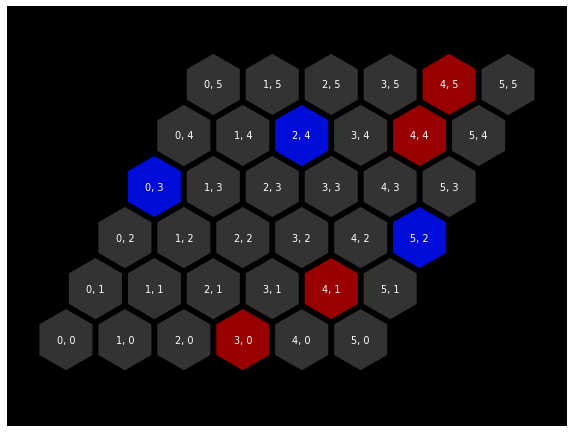

In [39]:
show_board(board0)

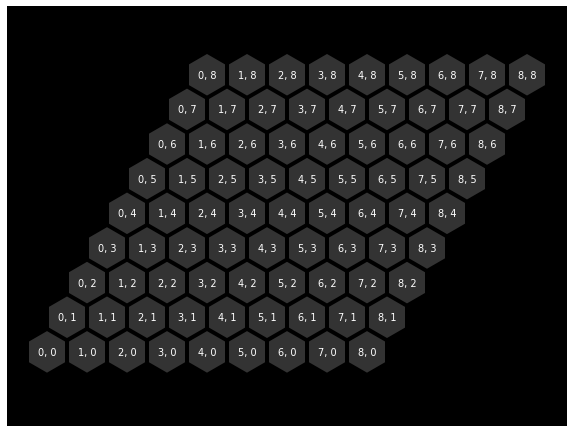

Reds turn


Input row coordinate:  2
Input column coordinates:  3


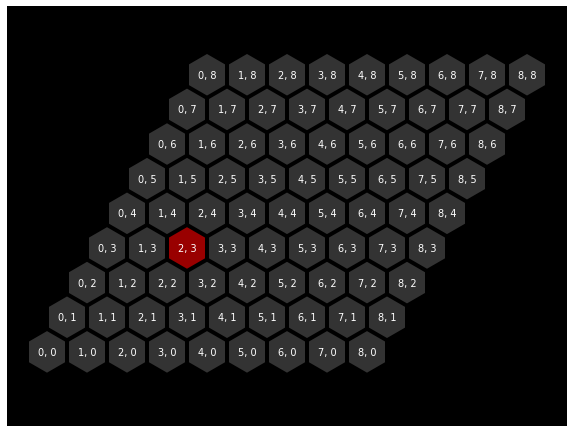

Blues turn
Finished depth of 1 after 0.0s.
Finished depth of 2 after 0.9176244735717773s.
Aborting at depth 3 early after 2.0048584938049316s.
Value: 0.01785714285714285
Nodes pruned (d=2):  161675
Nodes searched in (d=2):  6727
Nodes Pruned (d=2):   96.0%



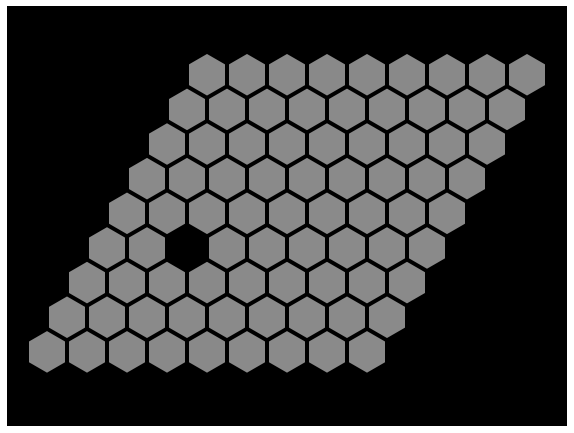

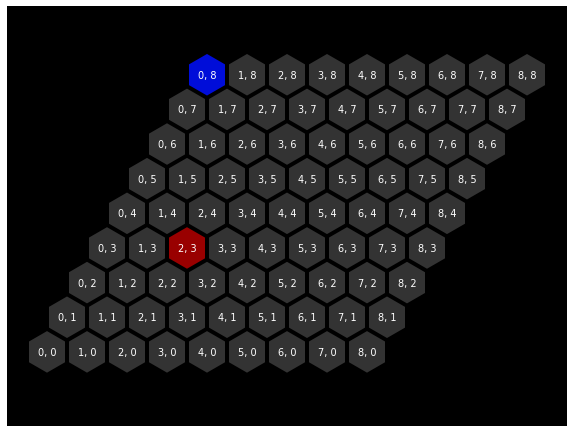

Reds turn


Input row coordinate:  3
Input column coordinates:  5


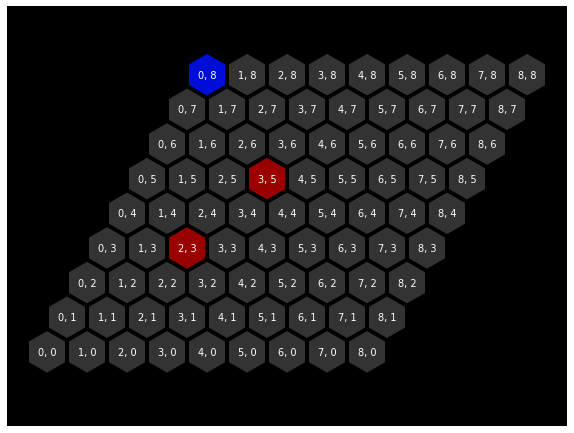

Blues turn
Finished depth of 1 after 0.015625476837158203s.
Finished depth of 2 after 0.9332966804504395s.
Aborting at depth 3 early after 2.004896879196167s.
Value: 0.0
Nodes pruned (d=2):  146160
Nodes searched in (d=2):  6464
Nodes Pruned (d=2):   95.8%



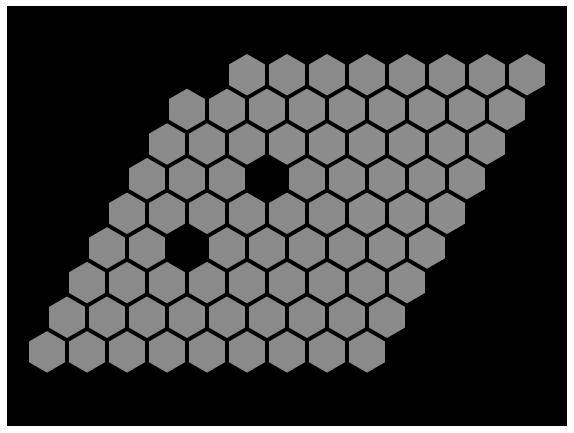

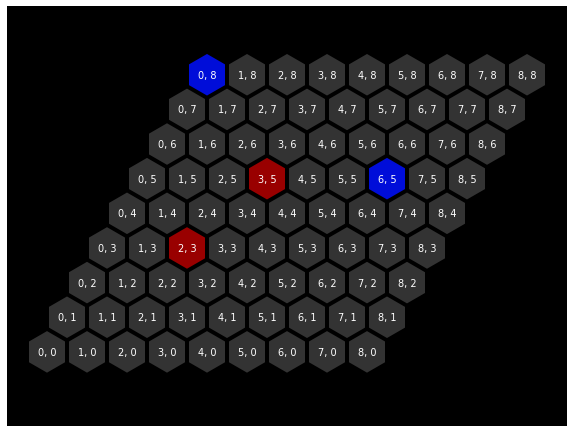

Reds turn


Input row coordinate:  5
Input column coordinates:  4


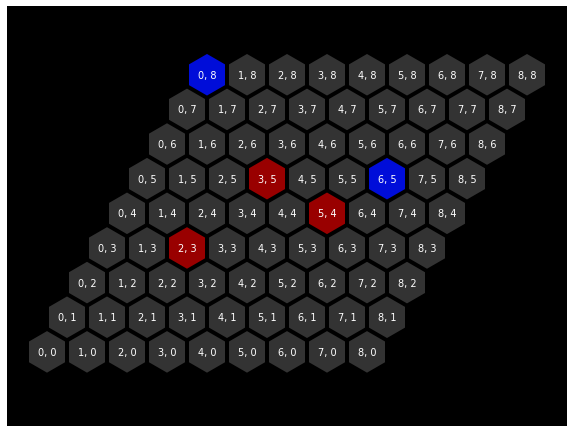

Blues turn
Finished depth of 1 after 0.015625s.
Finished depth of 2 after 0.8645708560943604s.
Aborting at depth 3 early after 2.005185604095459s.
Value: -0.023809523809523808
Nodes pruned (d=2):  166444
Nodes searched in (d=2):  7535
Nodes Pruned (d=2):   95.7%



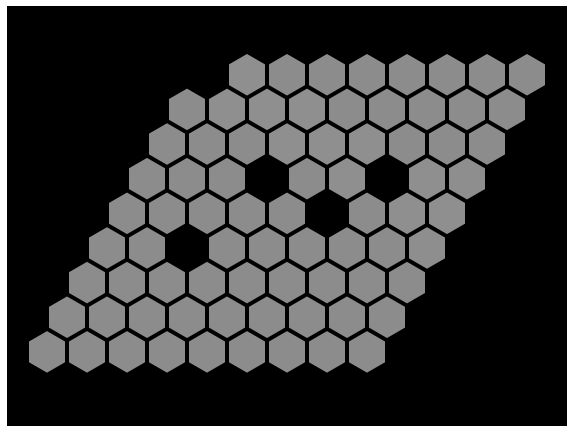

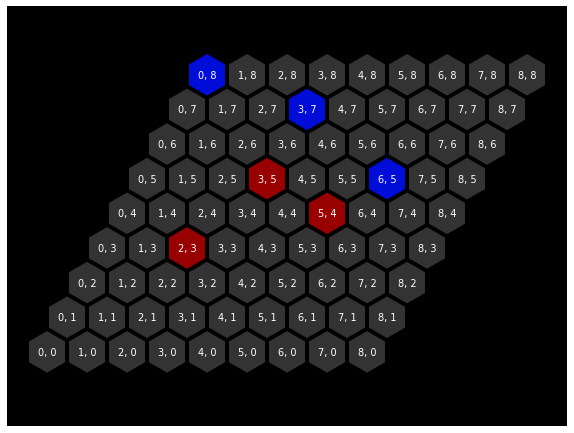

Reds turn


Input row coordinate:  5
Input column coordinates:  6


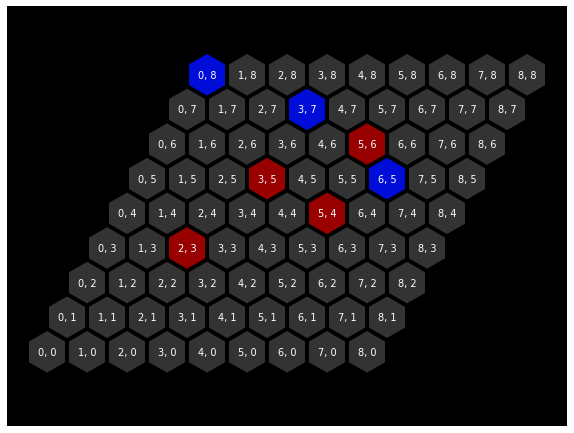

Blues turn
Finished depth of 1 after 0.015621423721313477s.
Finished depth of 2 after 0.7706277370452881s.
Aborting at depth 3 early after 2.0049943923950195s.
Value: -0.023809523809523808
Nodes pruned (d=2):  191700
Nodes searched in (d=2):  8302
Nodes Pruned (d=2):   95.8%



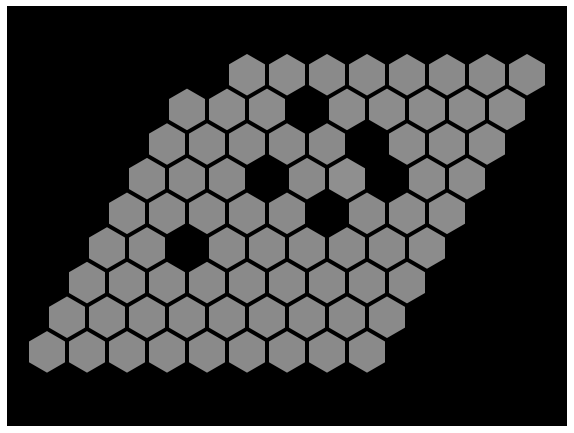

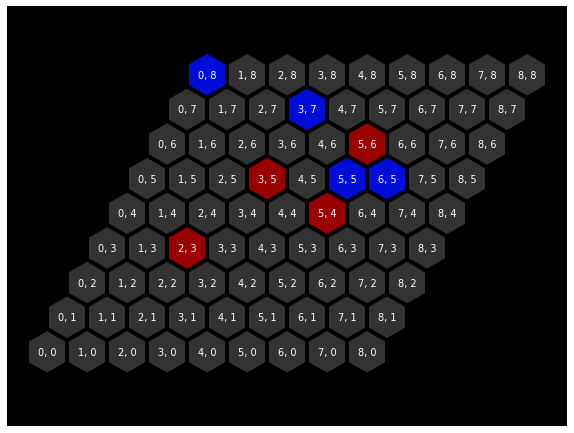

Reds turn


Input row coordinate:  4
Input column coordinates:  6


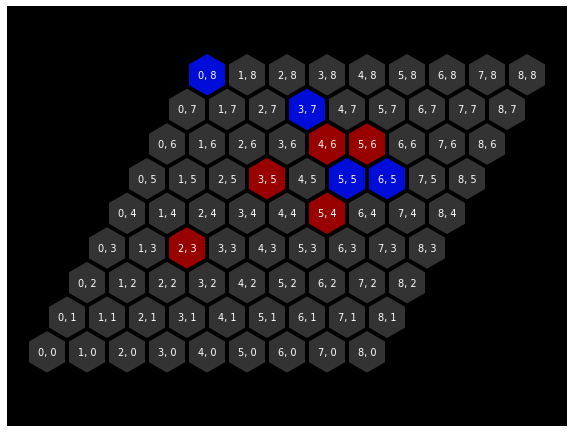

Blues turn
Finished depth of 1 after 0.015624523162841797s.
Finished depth of 2 after 0.7708191871643066s.
Aborting at depth 3 early after 2.0051987171173096s.
Value: 0.0
Nodes pruned (d=2):  132396
Nodes searched in (d=2):  7978
Nodes Pruned (d=2):   94.3%



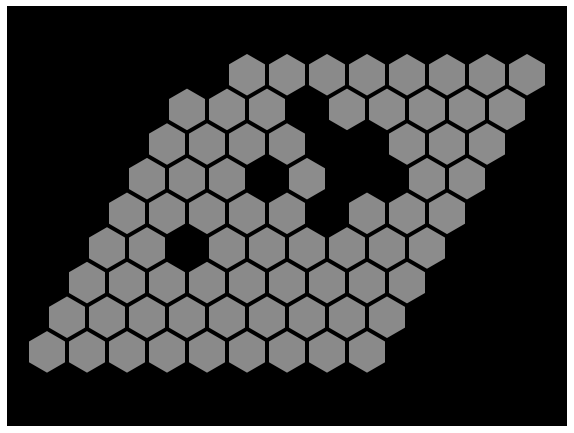

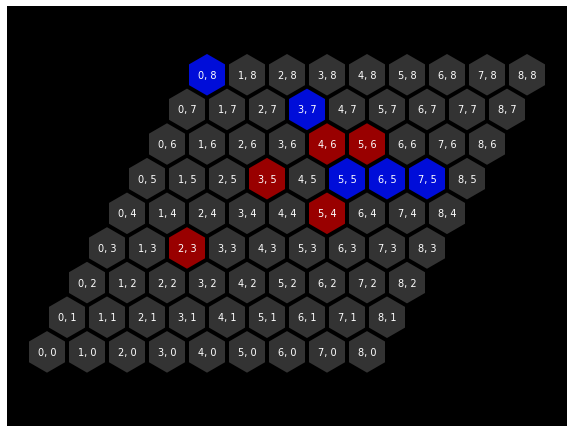

Reds turn


Input row coordinate:  4
Input column coordinates:  8


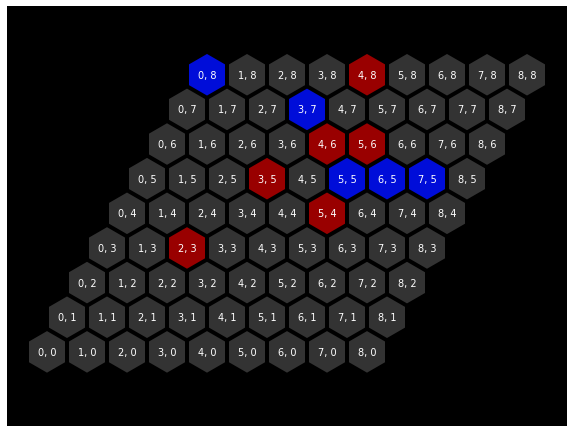

Blues turn
Finished depth of 1 after 0.0s.
Finished depth of 2 after 0.670557975769043s.
Aborting at depth 3 early after 2.005181312561035s.
Value: 0.0
Nodes pruned (d=2):  131878
Nodes searched in (d=2):  9018
Nodes Pruned (d=2):   93.6%



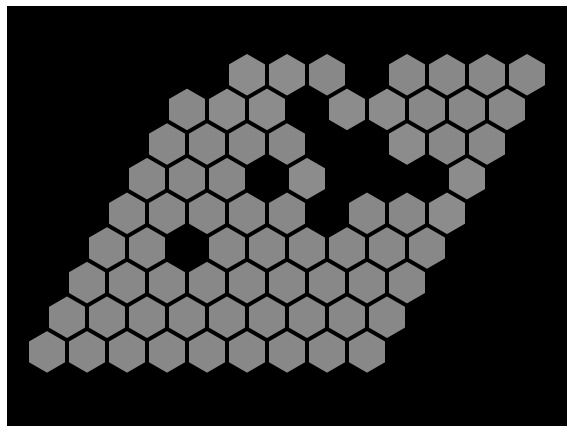

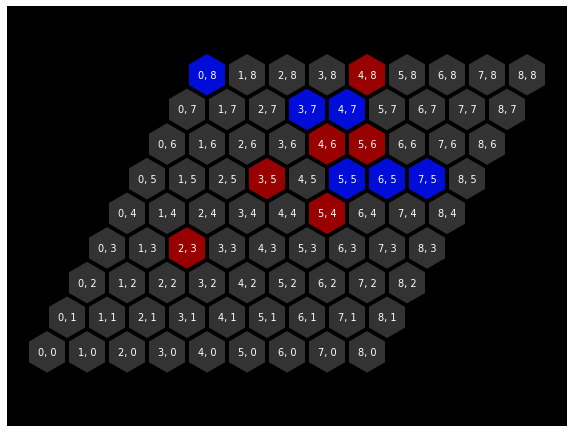

Reds turn


Input row coordinate:  2
Input column coordinates:  4


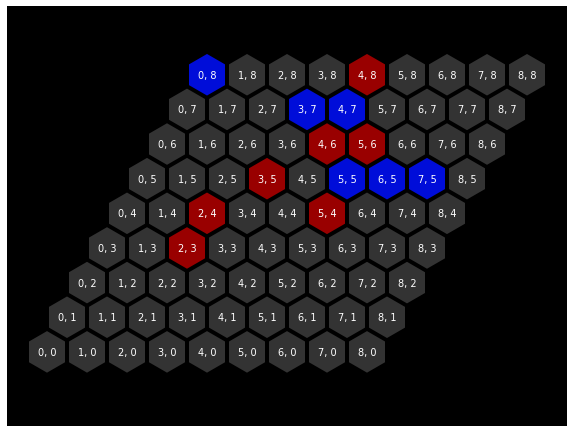

Blues turn
Finished depth of 1 after 0.0s.
Finished depth of 2 after 0.6393158435821533s.
Aborting at depth 3 early after 2.0051705837249756s.
Value: -0.05714285714285716
Nodes pruned (d=2):  133542
Nodes searched in (d=2):  9395
Nodes Pruned (d=2):   93.4%



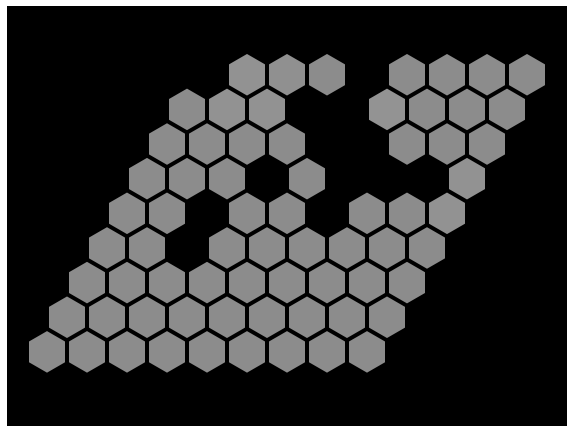

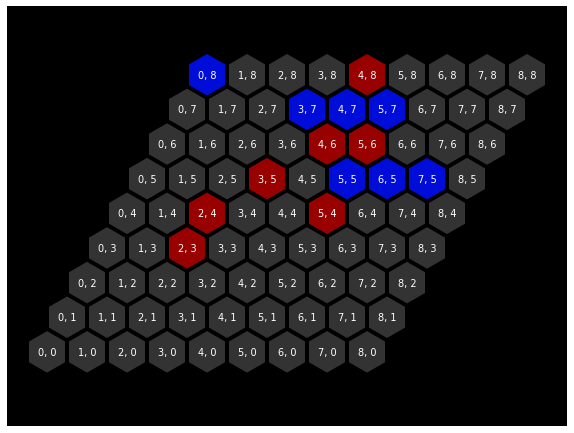

Reds turn


Input row coordinate:  3
Input column coordinates:  6


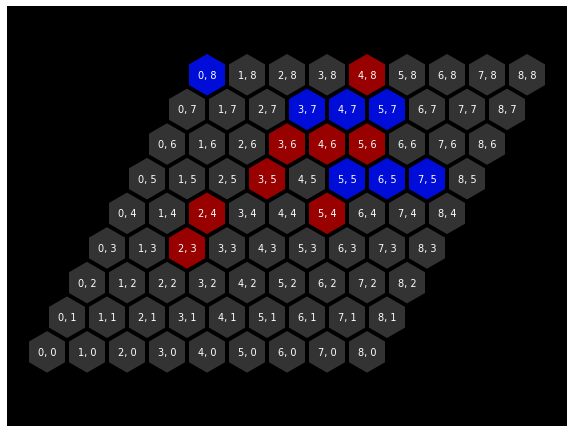

Blues turn
Finished depth of 1 after 0.0s.
Finished depth of 2 after 0.6171872615814209s.
Aborting at depth 3 early after 2.0047969818115234s.
Value: -0.1333333333333333
Nodes pruned (d=2):  90556
Nodes searched in (d=2):  10165
Nodes Pruned (d=2):   89.9%



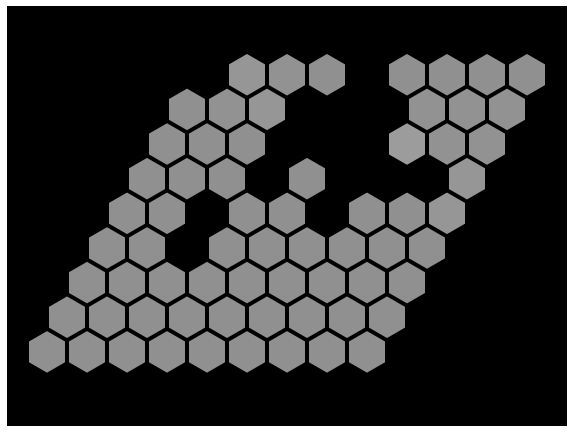

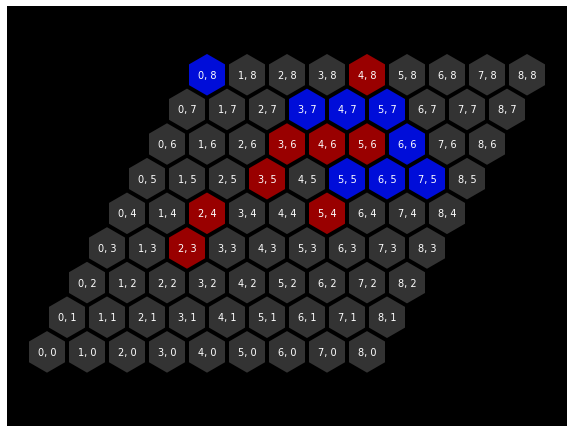

Reds turn


Input row coordinate:  1
Input column coordinates:  7


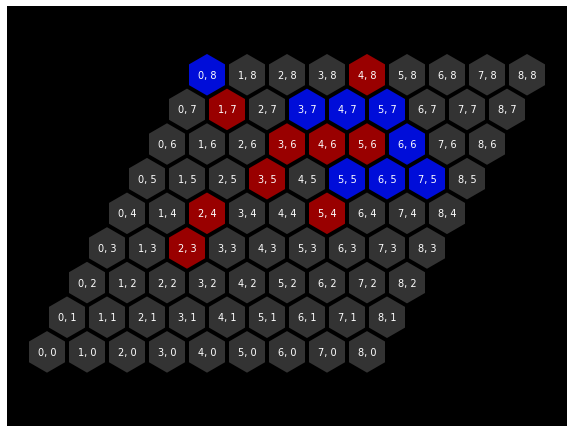

Blues turn
Finished depth of 1 after 0.007999897003173828s.
Finished depth of 2 after 0.5924732685089111s.
Aborting at depth 3 early after 2.002927541732788s.
Value: -0.3
Nodes pruned (d=2):  161975
Nodes searched in (d=2):  10137
Nodes Pruned (d=2):   94.1%



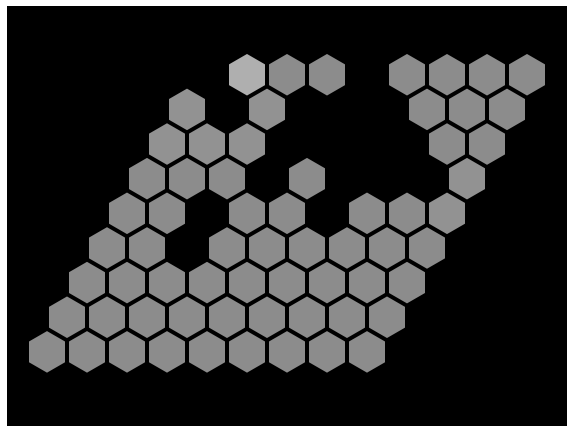

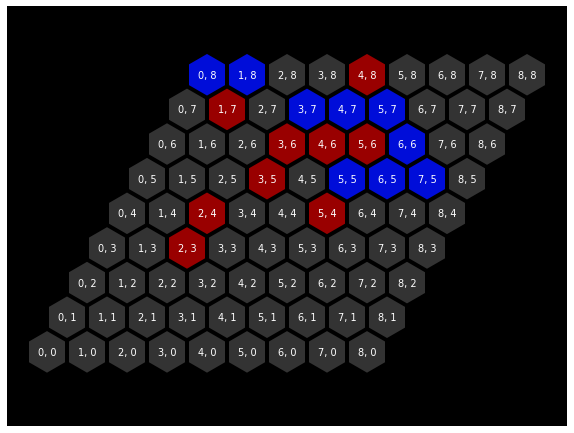

Reds turn


Input row coordinate:  4
Input column coordinates:  1


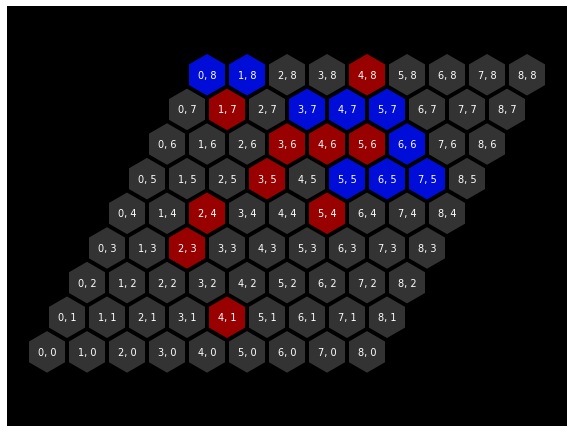

Blues turn
Finished depth of 1 after 0.007999420166015625s.
Finished depth of 2 after 0.5198459625244141s.
Aborting at depth 3 early after 2.0010557174682617s.
Value: -0.875
Nodes pruned (d=2):  118876
Nodes searched in (d=2):  10604
Nodes Pruned (d=2):   91.8%



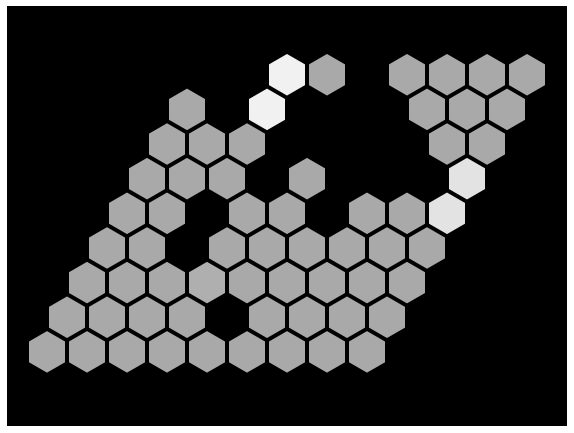

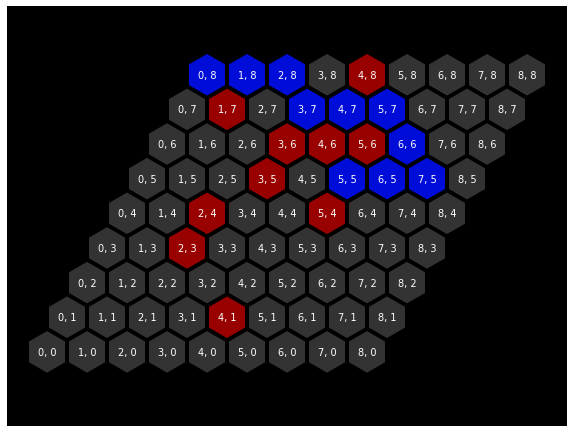

Reds turn


Input row coordinate:  8
Input column coordinates:  4


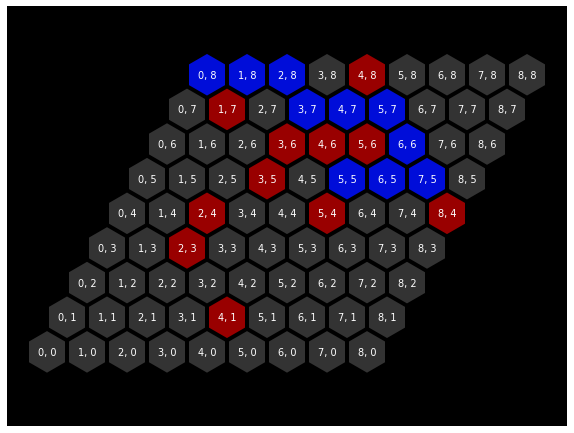

Blues turn
Finished depth of 1 after 0.007999897003173828s.
Finished depth of 2 after 0.4758596420288086s.
Finished depth of 3 after 1.3001883029937744s.
Aborting at depth 4 early after 2.0039820671081543s.
Value: -0.9735576923076923
Nodes pruned (d=2):  213228
Nodes searched in (d=2):  9319
Nodes Pruned (d=2):   95.8%

Blue has won!


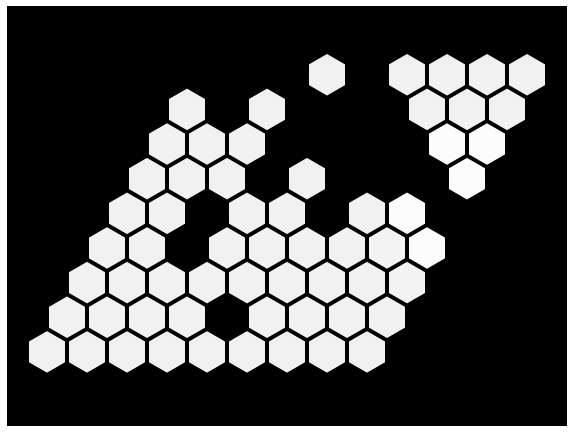

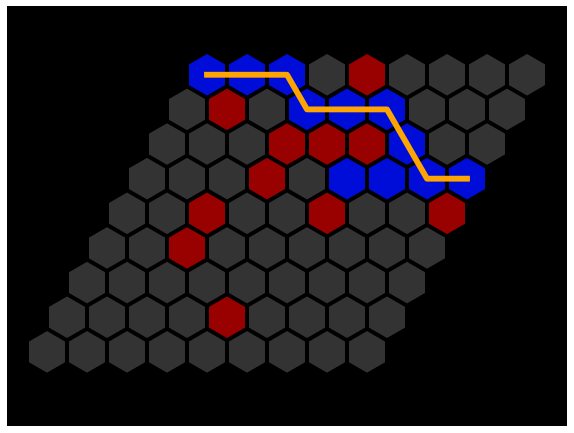

In [17]:
from hex_minmax import *
from hex_nnet import *

bsize = N = 9
board = np.zeros((bsize,bsize), int)

ai_blue = MiniMax(timelimit=2)
#ai_blue = MiniMax(maxdepth=2, heuristics=HexHeuristicsNNet())

turn = +1

while True:
    
    show_board(board, numbers=True)
    plt.show()
    
    if turn>0:
        print('Reds turn')
    
        # Human Input (if Human vs. Computer)
        #'''
        while True:
            x = input_int('Input row coordinate: ')
            y = input_int('Input column coordinates: ')
            if not ismovevalid(board, x, y):
                print('Move is not valid!')
                continue
            else:
                board[x,y] = +1
                break
         #       ''';

        ## Show things:
        #rating = np.zeros((bsize,bsize))
        #for i,j in _validmoves(board):
        #    b = _domove(board, (i,j), +1)
        #    rating[i,j] = maxmin(b, maximize=True, maxdepth=2)
        #rating = rating/2 + 1/2
        #show_board(rating, False, cmap='cividis')

        # Move by an AI
        #x, y = ai_red.findmove(board, True, verbose=5)
        
    else:
        print('Blues turn')
        
        '''
        # Human Input (if Human vs. Computer)
        while True:
            x = input_int('Input row coordinate: ')
            y = input_int('Input column coordinates: ')
            if not ismovevalid(board, x, y):
                print('Move is not valid!')
                continue
            else:
                board[x,y] = +1
                break''';

        # Move by an AI
        x, y = ai_blue.findmove(board, False, verbose=5)
        #x, y = alphabeta_makemove(board, maximize=False, maxdepth=4)
        ##x, y = rollout_makemove(board, False, n=50)
        
    
    board[x,y] = turn
    turn *= -1
    
    
    # If someone has won
    won = winner(board)
    if won!=0:
        path = winning_path(board)
        if won==+1:
            print('Red has won!')
        else:
            print('Blue has won!')
        show_board(board)
        show_path(path)
        plt.show()
        break

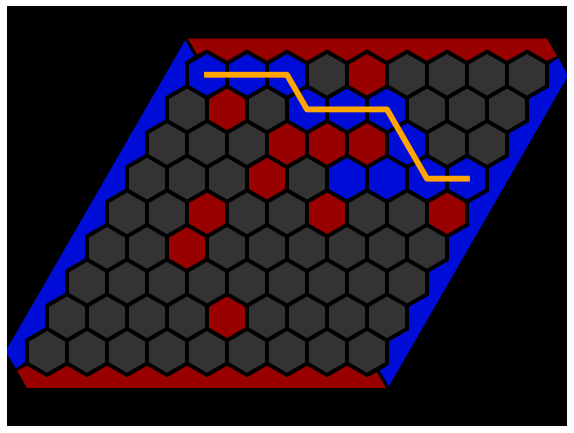

In [18]:

show_board(board)
show_path(path)
show_outerior(N)
plt.show()